<a href="https://colab.research.google.com/github/dtabuena/CrispyMice/blob/main/New_pipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'Get Standard Modules'

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import os
from scipy.signal import butter,filtfilt
from tqdm import tqdm
import warnings
from IPython.display import clear_output
from datetime import datetime
import sys
import warnings
import shutil
from google.colab import files
warnings.filterwarnings('ignore')
np.set_printoptions(threshold=sys.maxsize)
clear_output(wait=False)



!pip install openpyxl
!pip install XlsxWriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 7.6 MB/s 


In [2]:
'''Get Repositories'''
try: shutil.rmtree('/content/EphysLib')
except: None

"run dtabuena's ephys notebooks"
!git clone https://github.com/dtabuena/EphysLib

to_import = [
          'ABF_Quality_Control.ipynb',
          'Basic_Ephys.ipynb',
          'gain_analyzer.ipynb',
          'Simple_ABF_tools.ipynb',
          'IV_analyzer.ipynb',
          'Vm_analyzer.ipynb',
          'membrane_analyzer.ipynb',
          'rheobase_analyzer.ipynb',
          'fun_math.ipynb',
          'importing_abfs_from_dropbox.ipynb',
          'input_resistance_analyzer.ipynb',
          'latencey_analyzer.ipynb',
          'QC_recoding_dataframe.ipynb'
            ]
for i in to_import:
    f = '/content/EphysLib/' + i
    %run $f


try: shutil.rmtree('/content/CrispyMice')
except: None
!git clone https://github.com/dtabuena/CrispyMice
to_import = ['CrispyPipelineFuncs.ipynb']
for i in to_import:
    f = '/content/CrispyMice/' + i
    %run $f

Cloning into 'EphysLib'...
remote: Enumerating objects: 307, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 307 (delta 141), reused 150 (delta 104), pack-reused 94
Receiving objects: 100% (307/307), 218.57 KiB | 9.11 MiB/s, done.
Resolving deltas: 100% (185/185), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.2 MB/s 
Cloning into 'CrispyMice'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 162 (delta 43), reused 25 (delta 25), pack-reused 107
Receiving objects: 100% (162/162), 4.15 MiB | 11.88 MiB/s, done.
Resolving deltas: 100% (72/72), done.


In [3]:
dataset = {'data_name': 'RNF182',
           'data_source': "https://www.dropbox.com/sh/n9t8p257wnzlijk/AAC9Z36JodisyZjnM3mkJC3Xa?dl=0",
           'file_naming_scheme': ['Rec_date','Virus','GenoType','Sex','Age','Slice_Num','Cell_num','Cell_Type'],
           }

VC_prot = ['VC - MemTest-10ms-160ms',
           'VC - Multi IV - 150ms',]
IC_prot = ['IC - Gain - D20pA',
           'IC - Gain - D50pA',
           'IC - Rheobase',
           'IC - R input',
           'IC - Latentcy 800pA-1s'
           'VC - 3min GapFree']

In [4]:

'''Unpack'''
data_name = dataset['data_name']
data_source = dataset['data_source']
file_naming_scheme = dataset['file_naming_scheme']



''' Gather and Catalog Source Data'''
file_loc = get_drobox_folder(data_source, 'my_ephys_data')
clear_output(wait=False)   
abf_recordings_df, protocol_set = catalogue_recs(file_loc,file_naming_scheme)
# abf_recordings_df, _ = purge_wrong_clamp(abf_recordings_df,VC_prot,IC_prot)
# cell_prot_lut(abf_recordings_df,protocol_set,csv_name=data_name+'_LUT')

  0%|          | 1/256 [00:03<14:40,  3.45s/it]

error on:  my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s001_c001_CA3xPOS_0000.abf


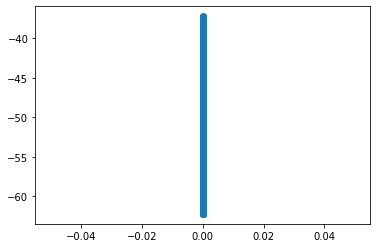

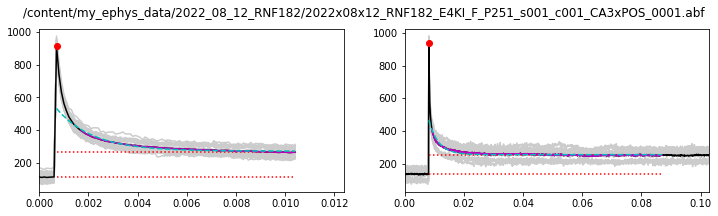

  2%|▏         | 5/256 [00:18<12:09,  2.91s/it]

<Figure size 432x288 with 0 Axes>

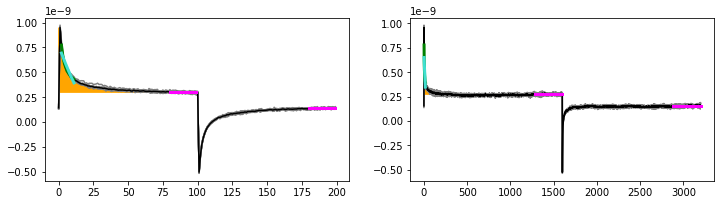

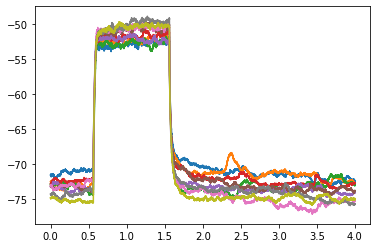

  2%|▏         | 6/256 [00:22<13:46,  3.30s/it]

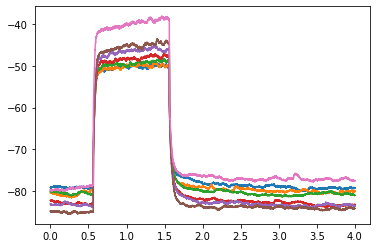

  3%|▎         | 7/256 [00:25<13:33,  3.27s/it]

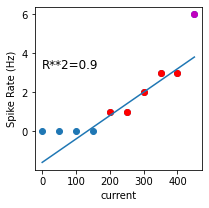

  3%|▎         | 8/256 [00:28<12:42,  3.08s/it]

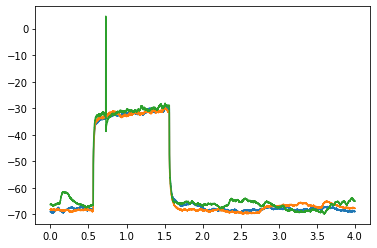

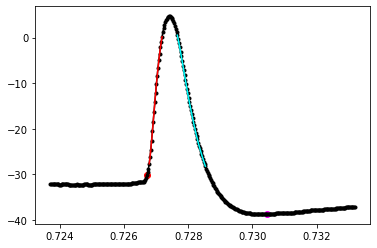

  4%|▍         | 10/256 [00:34<11:42,  2.86s/it]

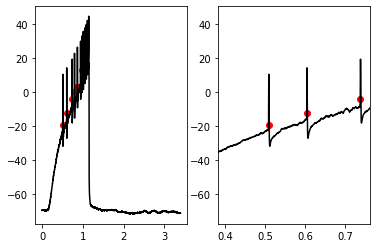

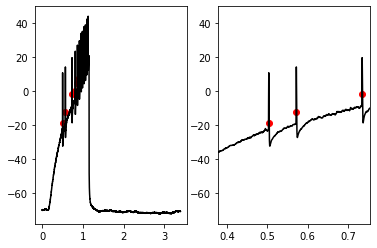

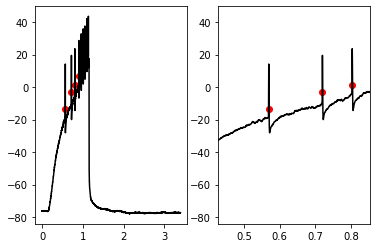

  4%|▍         | 11/256 [00:39<14:23,  3.52s/it]

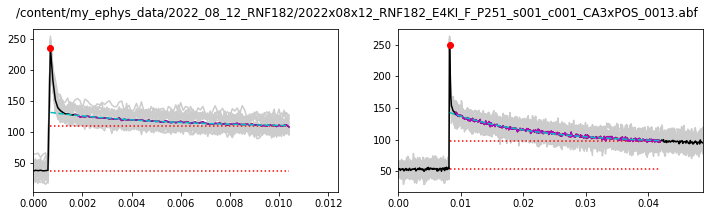

  6%|▌         | 15/256 [00:45<08:58,  2.23s/it]

error on:  my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s001_c001_CA3xPOS_0014.abf


<Figure size 432x288 with 0 Axes>

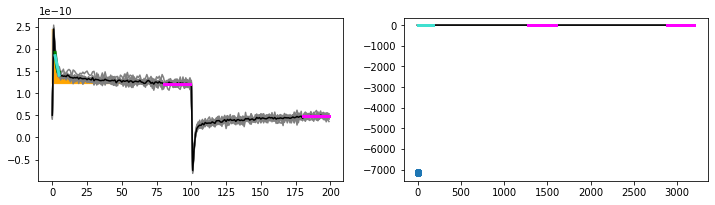

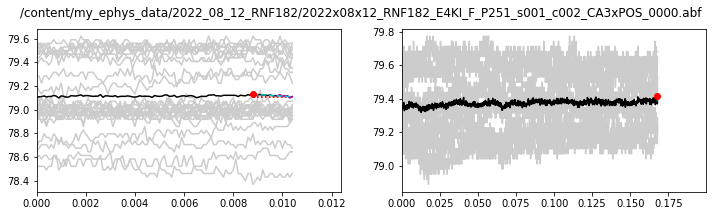

  6%|▋         | 16/256 [00:47<08:47,  2.20s/it]

error on:  my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s001_c002_CA3xPOS_0000.abf


<Figure size 432x288 with 0 Axes>

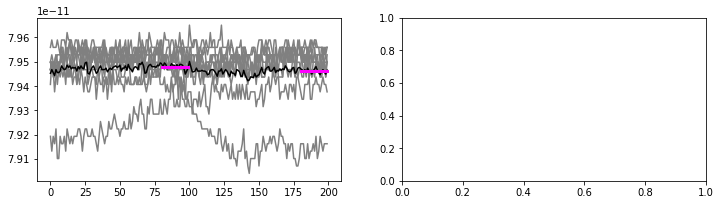

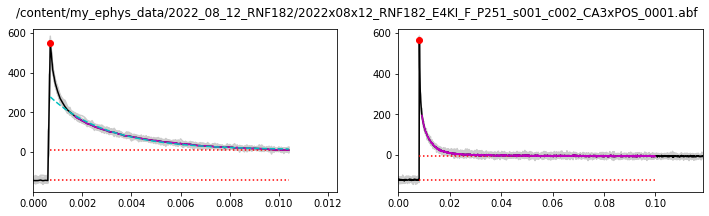

  7%|▋         | 18/256 [00:55<11:02,  2.78s/it]

<Figure size 432x288 with 0 Axes>

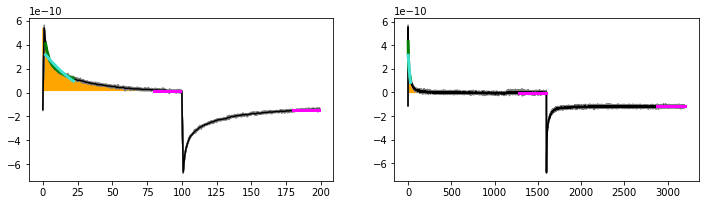

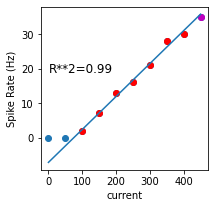

  8%|▊         | 20/256 [00:58<08:38,  2.20s/it]

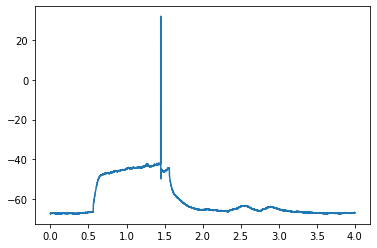

  8%|▊         | 21/256 [00:59<07:55,  2.02s/it]

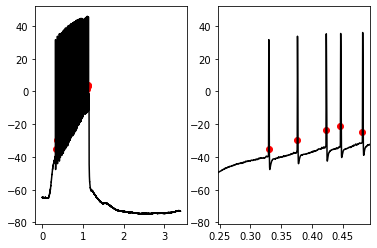

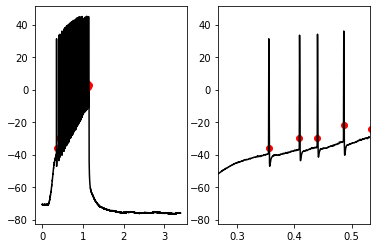

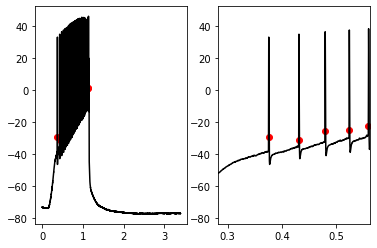

  9%|▉         | 23/256 [01:06<09:21,  2.41s/it]

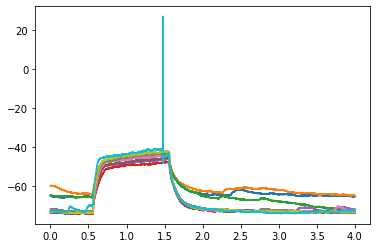

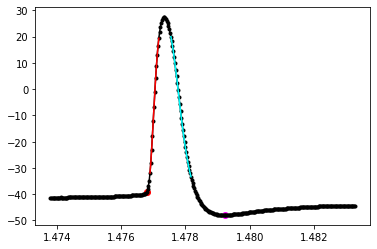

 10%|▉         | 25/256 [01:14<11:22,  2.95s/it]

error on:  my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s001_c003_CA3xNEG_0007.abf


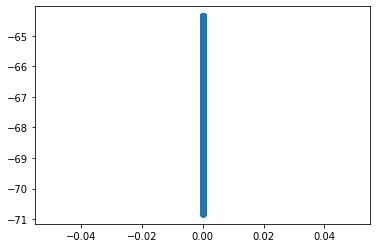

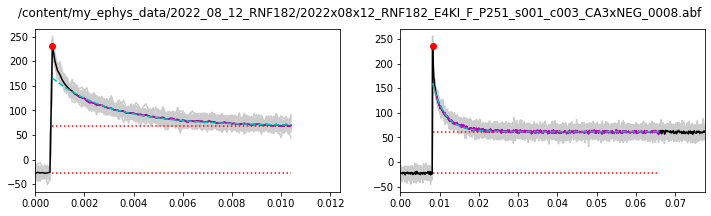

 10%|█         | 26/256 [01:19<14:13,  3.71s/it]

<Figure size 432x288 with 0 Axes>

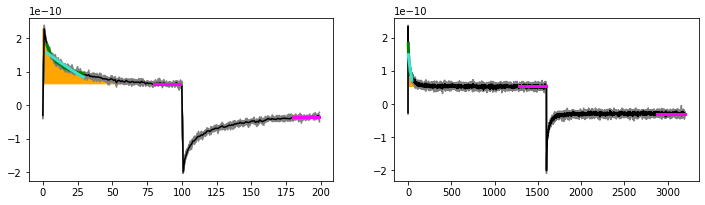

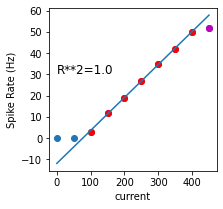

 11%|█         | 27/256 [01:22<13:15,  3.48s/it]

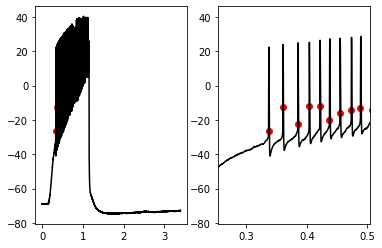

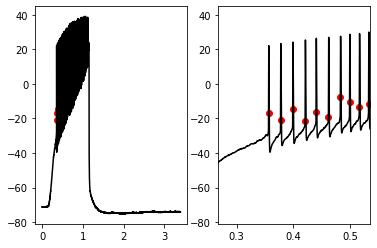

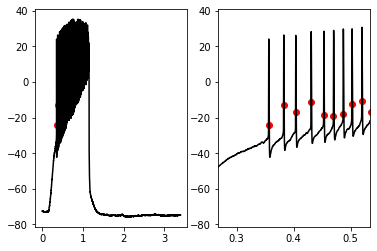

 11%|█         | 28/256 [01:27<15:02,  3.96s/it]

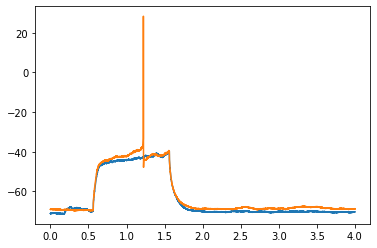

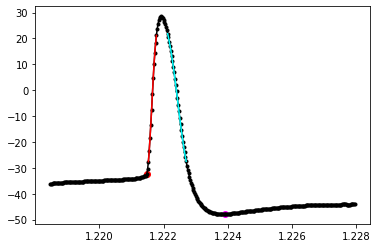

 12%|█▏        | 31/256 [01:34<10:00,  2.67s/it]

<Figure size 432x288 with 0 Axes>

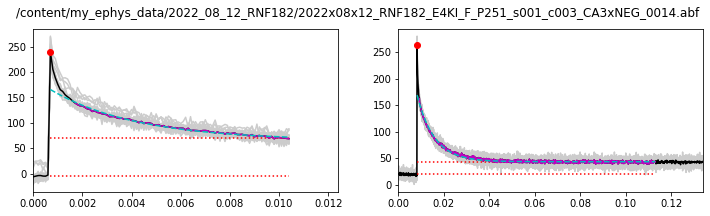

 13%|█▎        | 34/256 [01:42<08:48,  2.38s/it]

error on:  my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s001_c004_CA3xNEG_0000.abf


<Figure size 432x288 with 0 Axes>

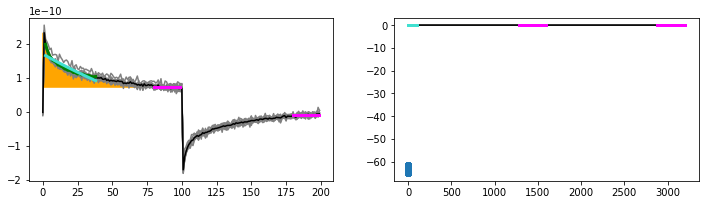

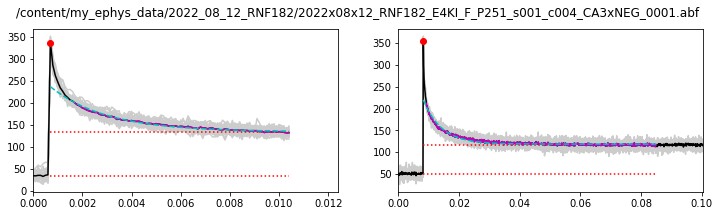

 14%|█▎        | 35/256 [01:48<11:58,  3.25s/it]

<Figure size 432x288 with 0 Axes>

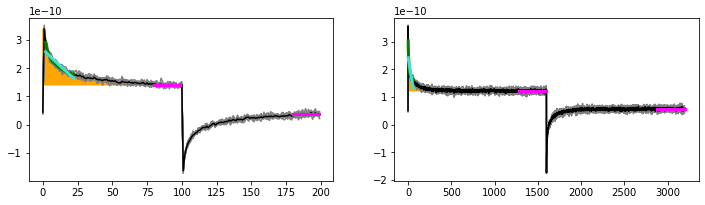

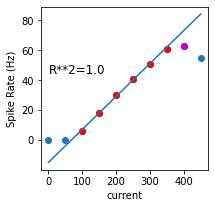

 14%|█▍        | 36/256 [01:51<11:30,  3.14s/it]

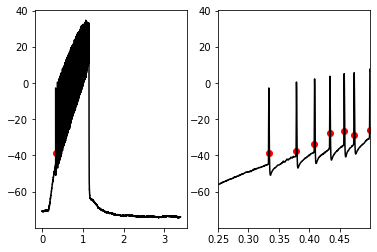

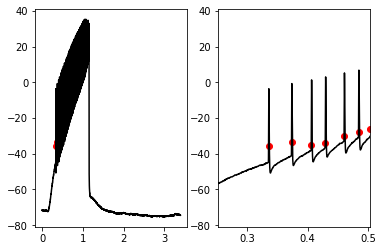

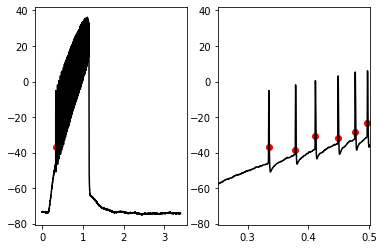

 14%|█▍        | 37/256 [01:56<13:24,  3.67s/it]

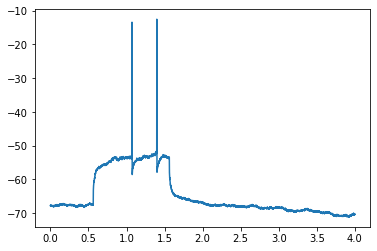

 15%|█▍        | 38/256 [01:57<11:12,  3.08s/it]

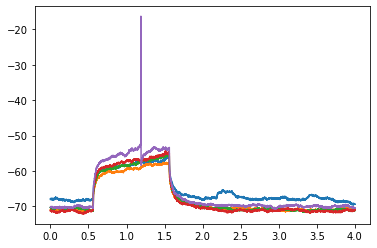

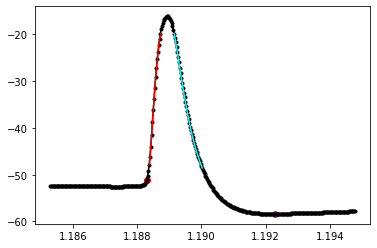

 17%|█▋        | 43/256 [02:07<06:46,  1.91s/it]

error on:  my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s001_c005_CA3xNEG_0000.abf


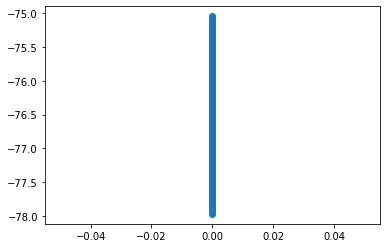

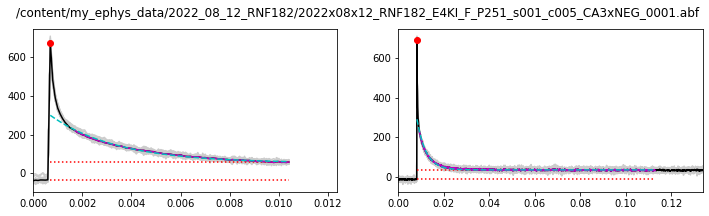

 17%|█▋        | 44/256 [02:13<10:06,  2.86s/it]

<Figure size 432x288 with 0 Axes>

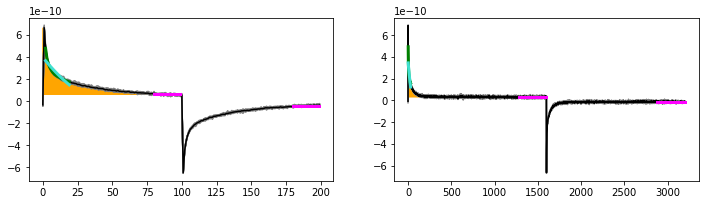

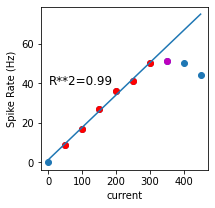

 18%|█▊        | 45/256 [02:16<10:01,  2.85s/it]

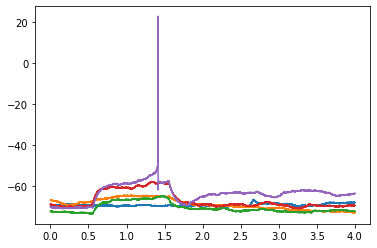

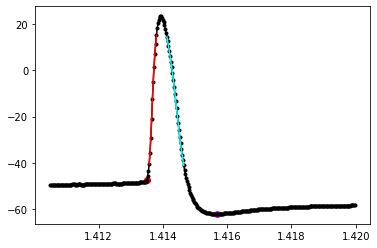

 18%|█▊        | 46/256 [02:21<12:06,  3.46s/it]

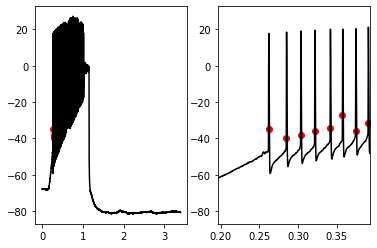

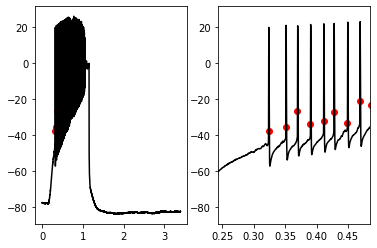

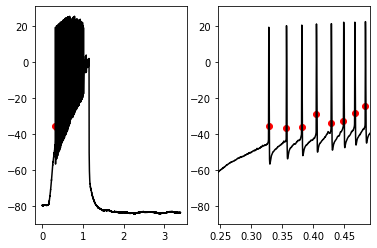

 18%|█▊        | 47/256 [02:26<13:49,  3.97s/it]

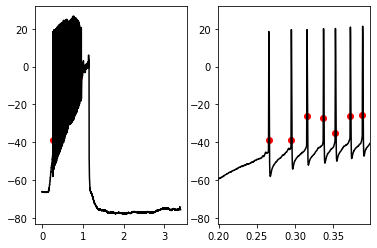

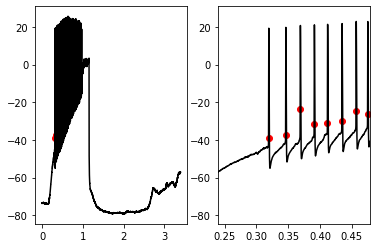

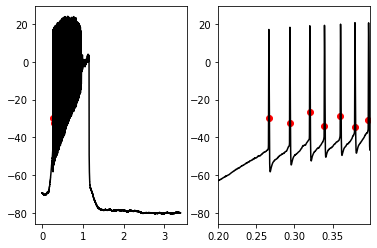

 21%|██        | 54/256 [02:36<04:49,  1.43s/it]

error on:  my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s002_c006_CA3xPOS_0000.abf


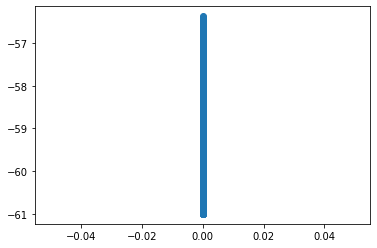

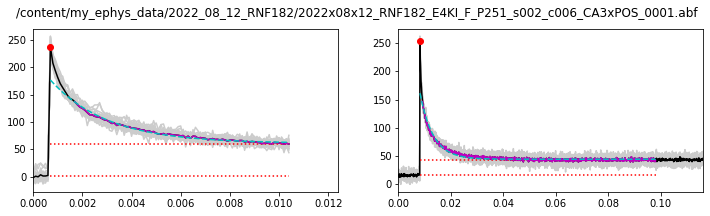

 21%|██▏       | 55/256 [02:42<07:25,  2.22s/it]

<Figure size 432x288 with 0 Axes>

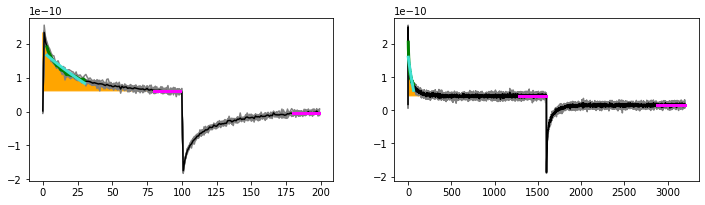

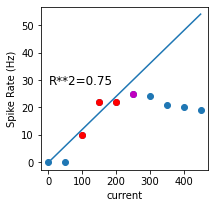

 22%|██▏       | 56/256 [02:45<07:51,  2.36s/it]

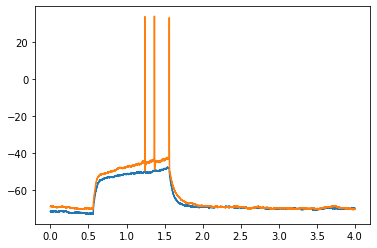

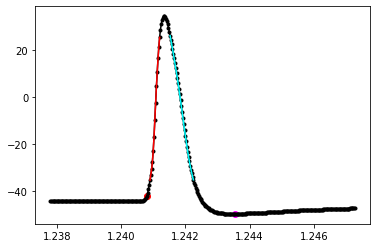

 22%|██▏       | 57/256 [02:49<09:19,  2.81s/it]

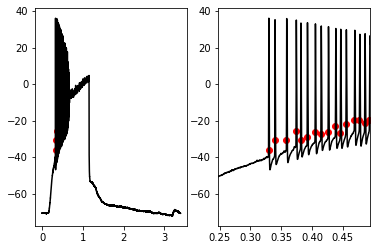

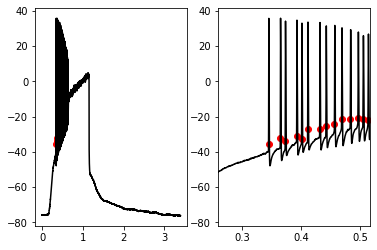

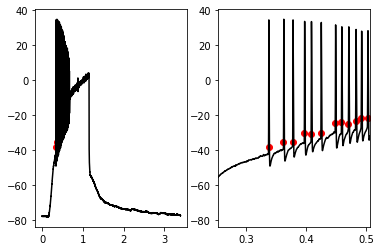

 23%|██▎       | 59/256 [02:56<09:21,  2.85s/it]

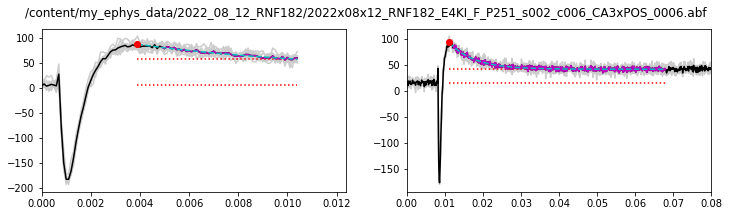

 23%|██▎       | 60/256 [02:57<08:10,  2.50s/it]

error on:  my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s002_c006_CA3xPOS_0006.abf


 24%|██▍       | 61/256 [02:59<07:32,  2.32s/it]

<Figure size 432x288 with 0 Axes>

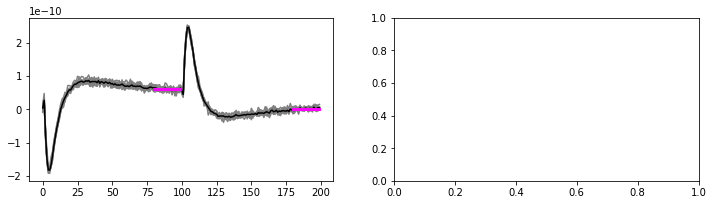

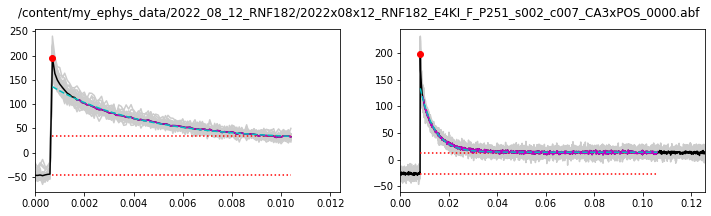

 25%|██▌       | 64/256 [03:06<07:27,  2.33s/it]

error on:  my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s002_c007_CA3xPOS_0001.abf


<Figure size 432x288 with 0 Axes>

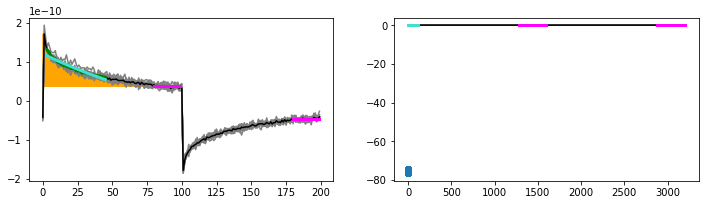

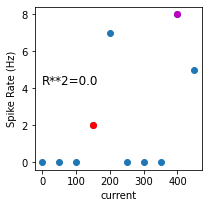

 26%|██▌       | 66/256 [03:12<08:03,  2.54s/it]

error on:  my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s002_c008_CA3xPOS_0000.abf


 26%|██▌       | 67/256 [03:15<08:36,  2.73s/it]

error on:  my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s002_c008_CA3xPOS_0001.abf


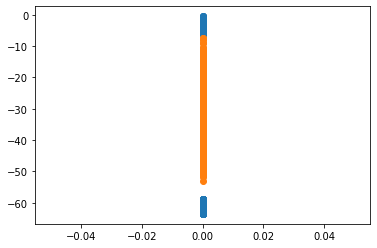

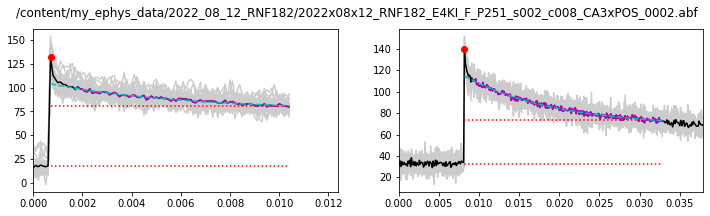

 27%|██▋       | 69/256 [03:23<09:54,  3.18s/it]

<Figure size 432x288 with 0 Axes>

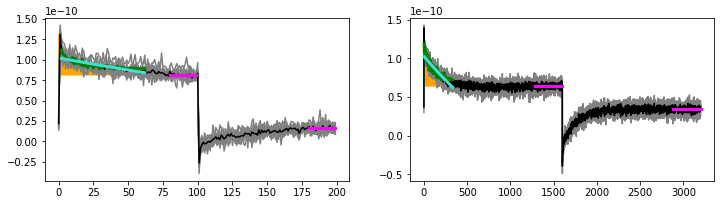

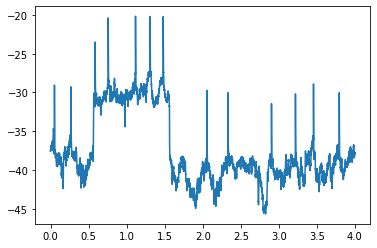

 27%|██▋       | 70/256 [03:25<08:34,  2.76s/it]

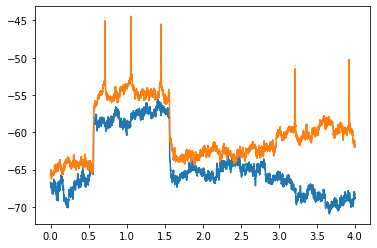

 28%|██▊       | 71/256 [03:27<07:48,  2.53s/it]

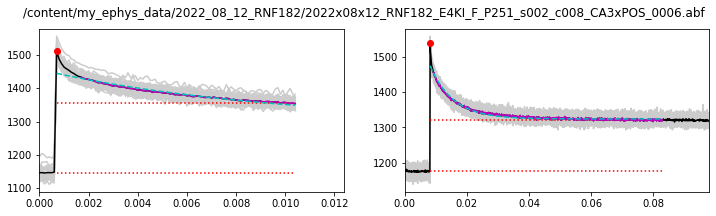

 29%|██▊       | 73/256 [03:36<09:56,  3.26s/it]

error on:  my_ephys_data/2022_08_15/2022x08x15_RNF182_E4KI_F_P251_s001_c001_CA3xPOS_0000.abf


<Figure size 432x288 with 0 Axes>

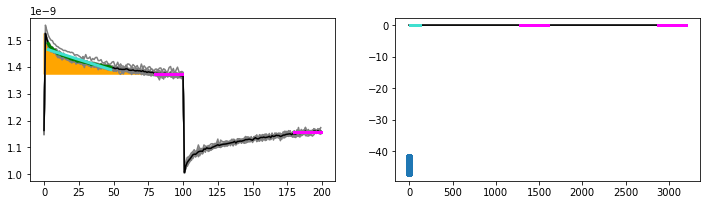

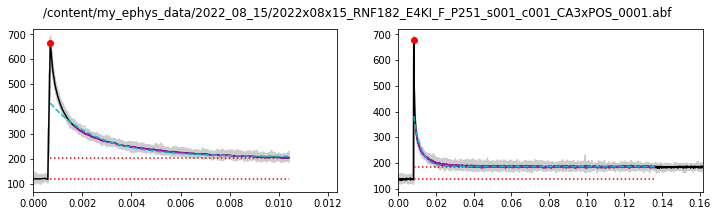

 29%|██▉       | 75/256 [03:44<10:23,  3.44s/it]

<Figure size 432x288 with 0 Axes>

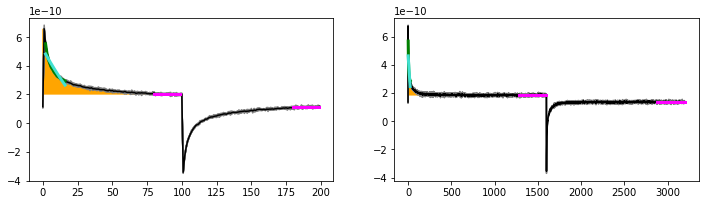

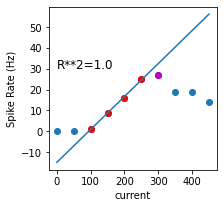

 30%|██▉       | 76/256 [03:47<09:49,  3.27s/it]

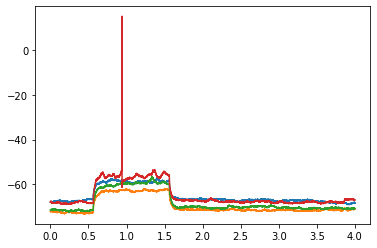

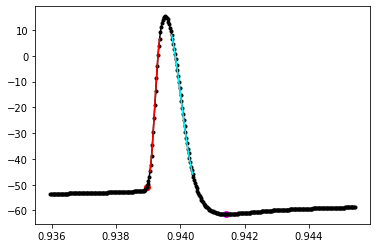

 31%|███       | 79/256 [03:53<06:51,  2.33s/it]

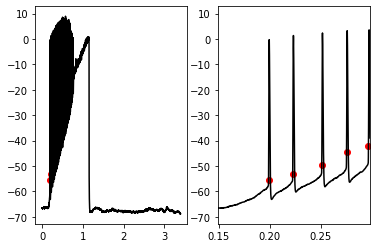

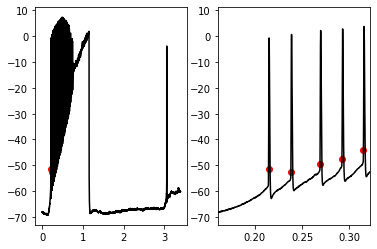

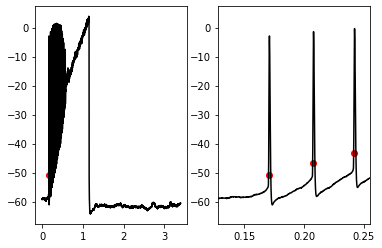

 31%|███▏      | 80/256 [03:58<08:57,  3.05s/it]

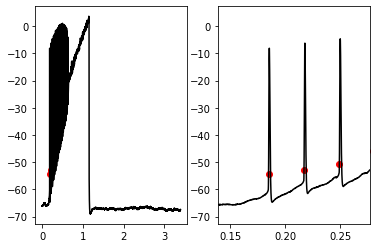

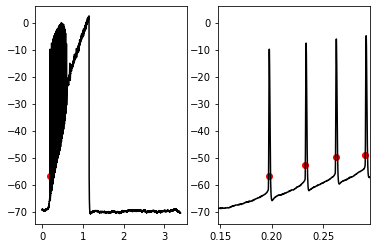

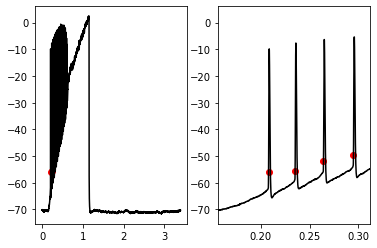

 32%|███▏      | 81/256 [04:03<10:34,  3.63s/it]

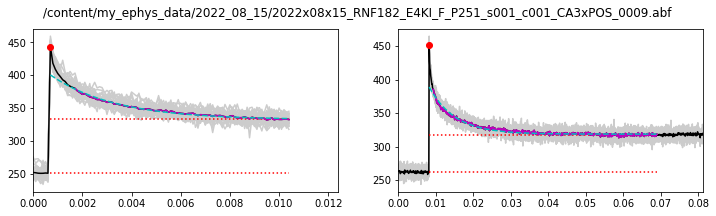

 32%|███▏      | 82/256 [04:09<12:03,  4.16s/it]

<Figure size 432x288 with 0 Axes>

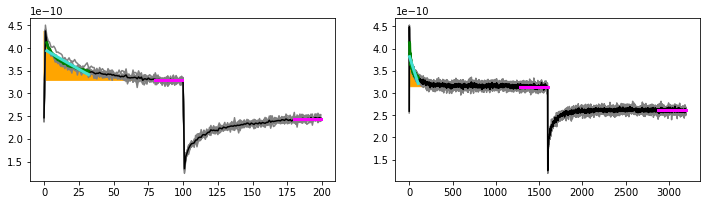

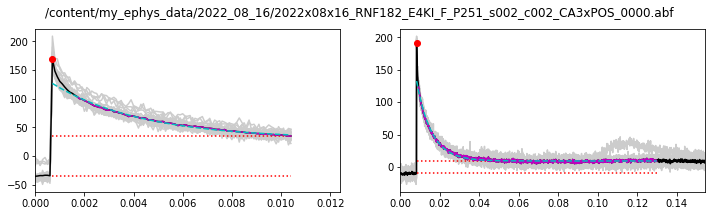

 33%|███▎      | 84/256 [04:18<11:58,  4.18s/it]

error on:  my_ephys_data/2022_08_16/2022x08x16_RNF182_E4KI_F_P251_s002_c002_CA3xPOS_0001.abf


 33%|███▎      | 85/256 [04:23<12:38,  4.44s/it]

<Figure size 432x288 with 0 Axes>

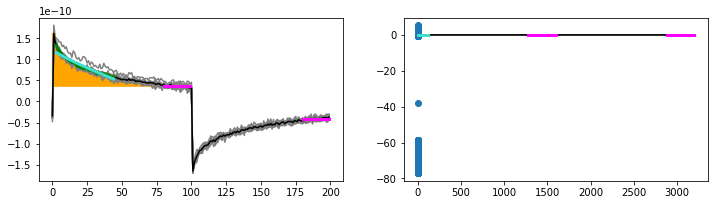

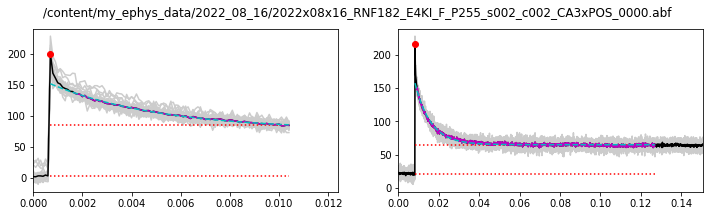

 34%|███▍      | 87/256 [04:31<11:45,  4.17s/it]

error on:  my_ephys_data/2022_08_16/2022x08x16_RNF182_E4KI_F_P255_s002_c002_CA3xPOS_0001.abf


<Figure size 432x288 with 0 Axes>

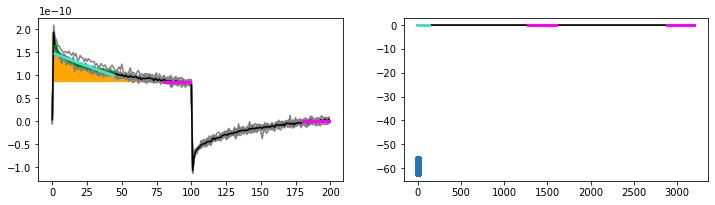

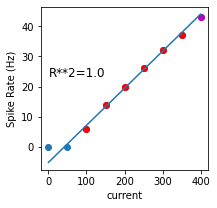

 34%|███▍      | 88/256 [04:34<10:34,  3.78s/it]

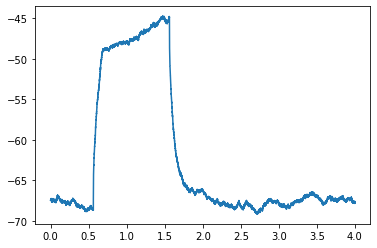

 35%|███▍      | 89/256 [04:36<08:41,  3.12s/it]

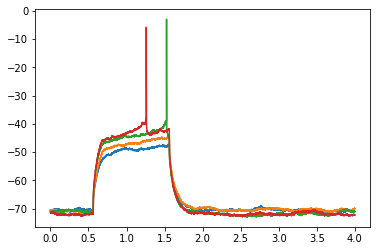

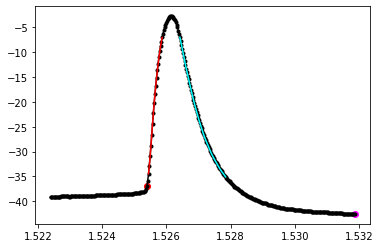

 36%|███▌      | 92/256 [04:41<05:06,  1.87s/it]

error on:  my_ephys_data/2022_08_16/2022x08x16_RNF182_E4KI_F_P255_s002_c002_CA3xPOS_0005.abf
error on:  my_ephys_data/2022_08_16/2022x08x16_RNF182_E4KI_F_P255_s002_c002_CA3xPOS_0006.abf


 37%|███▋      | 94/256 [04:43<04:15,  1.58s/it]

<Figure size 432x288 with 0 Axes>

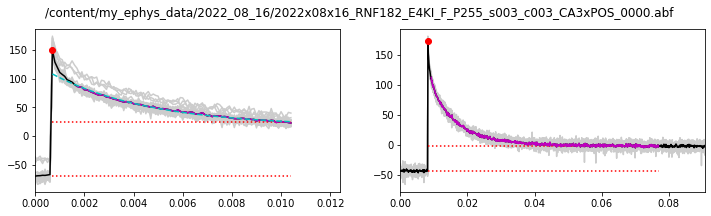

 38%|███▊      | 96/256 [04:53<08:48,  3.30s/it]

error on:  my_ephys_data/2022_08_16/2022x08x16_RNF182_E4KI_F_P255_s003_c003_CA3xPOS_0001.abf


 38%|███▊      | 97/256 [05:00<11:26,  4.32s/it]

<Figure size 432x288 with 0 Axes>

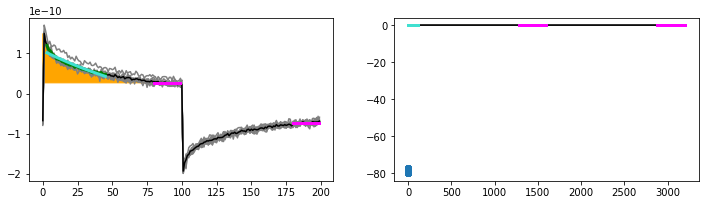

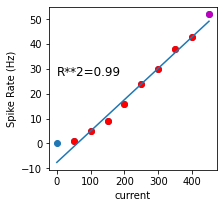

 38%|███▊      | 98/256 [05:03<10:29,  3.99s/it]

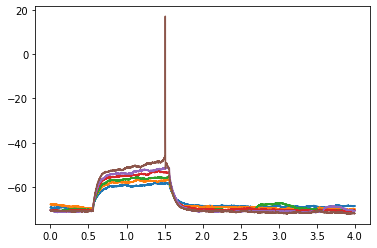

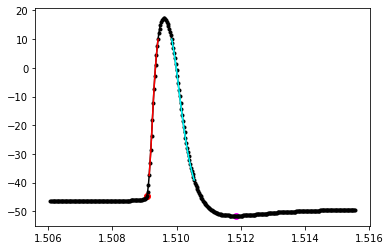

 39%|███▊      | 99/256 [05:10<12:24,  4.74s/it]

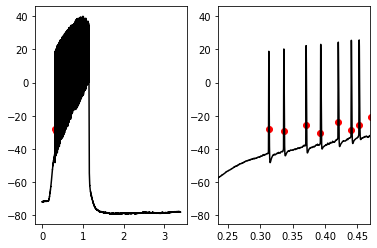

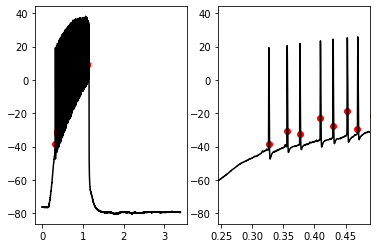

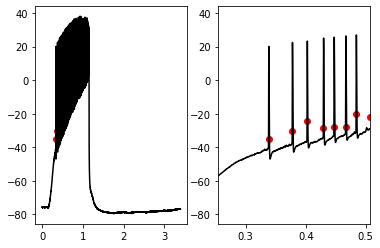

 39%|███▉      | 100/256 [05:15<12:44,  4.90s/it]

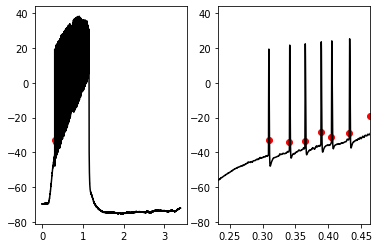

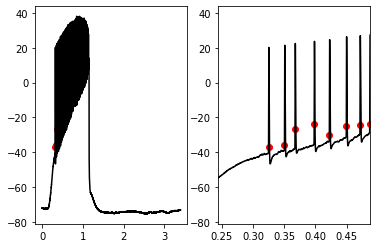

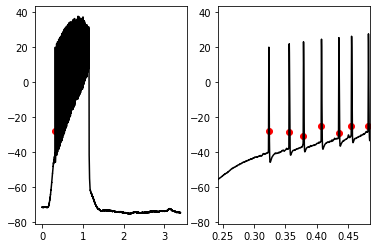

 40%|███▉      | 102/256 [05:22<10:01,  3.90s/it]

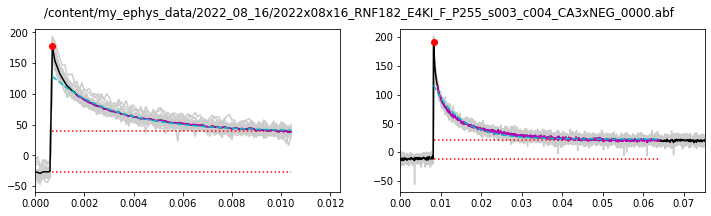

 41%|████      | 104/256 [05:29<09:13,  3.64s/it]

error on:  my_ephys_data/2022_08_16/2022x08x16_RNF182_E4KI_F_P255_s003_c004_CA3xNEG_0001.abf


<Figure size 432x288 with 0 Axes>

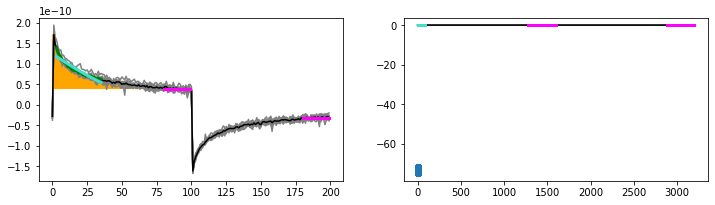

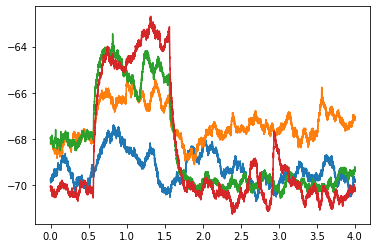

 41%|████      | 105/256 [05:32<08:41,  3.45s/it]

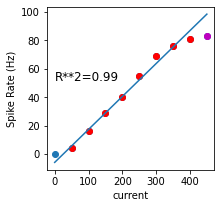

 41%|████▏     | 106/256 [05:35<07:59,  3.20s/it]

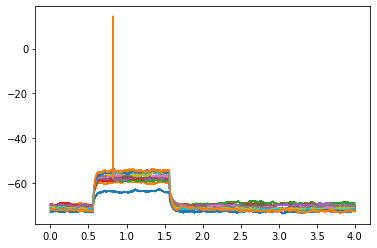

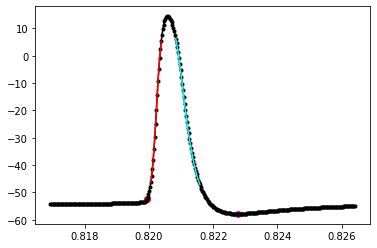

 42%|████▏     | 107/256 [05:42<10:45,  4.33s/it]

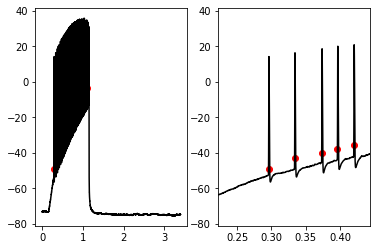

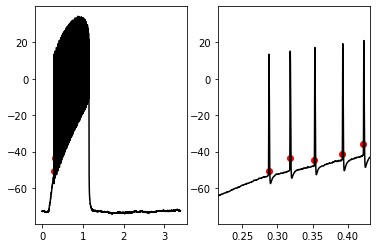

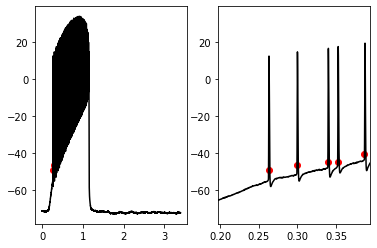

 42%|████▏     | 108/256 [05:47<11:19,  4.59s/it]

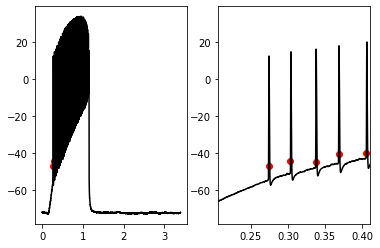

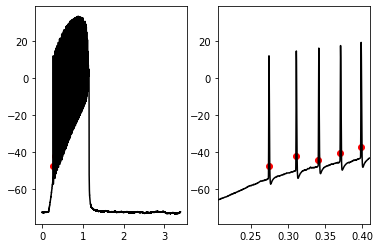

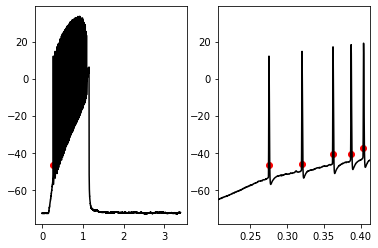

 43%|████▎     | 110/256 [05:53<09:07,  3.75s/it]

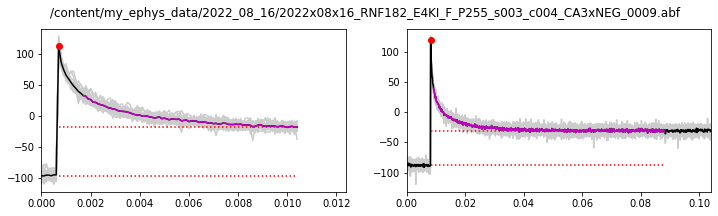

 44%|████▍     | 112/256 [05:59<07:55,  3.30s/it]

<Figure size 432x288 with 0 Axes>

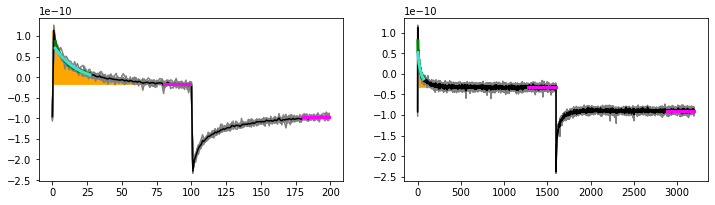

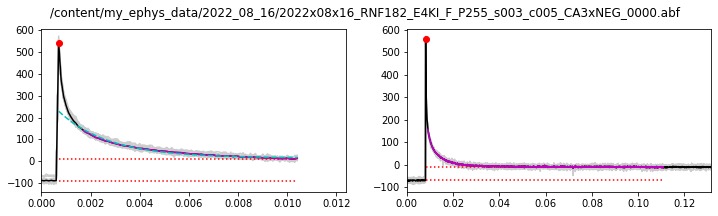

 45%|████▍     | 115/256 [06:09<07:51,  3.35s/it]

error on:  my_ephys_data/2022_08_16/2022x08x16_RNF182_E4KI_F_P255_s003_c005_CA3xNEG_0001.abf


<Figure size 432x288 with 0 Axes>

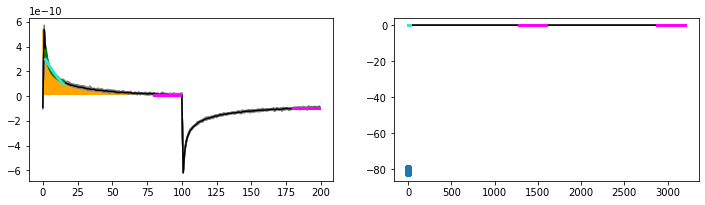

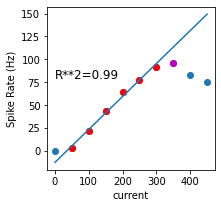

 45%|████▌     | 116/256 [06:12<07:43,  3.31s/it]

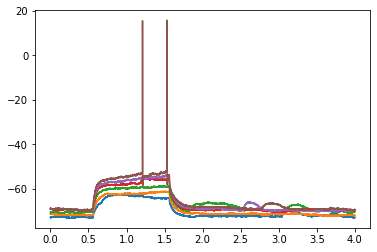

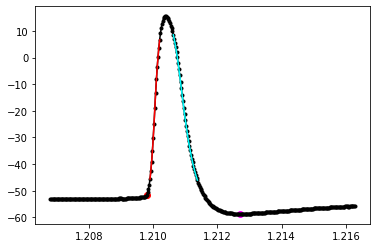

 46%|████▌     | 117/256 [06:17<08:50,  3.82s/it]

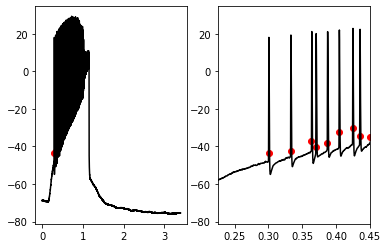

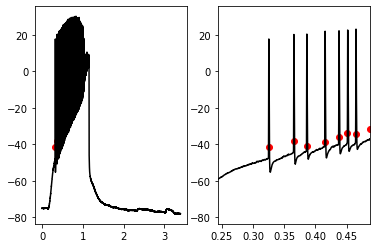

 47%|████▋     | 120/256 [06:23<05:48,  2.56s/it]

<Figure size 432x288 with 0 Axes>

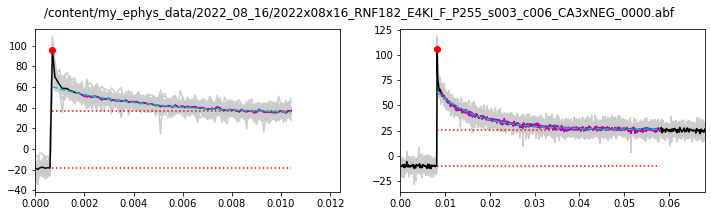

 48%|████▊     | 122/256 [06:30<06:20,  2.84s/it]

error on:  my_ephys_data/2022_08_16/2022x08x16_RNF182_E4KI_F_P255_s003_c006_CA3xNEG_0001.abf


 48%|████▊     | 123/256 [06:32<05:45,  2.60s/it]

<Figure size 432x288 with 0 Axes>

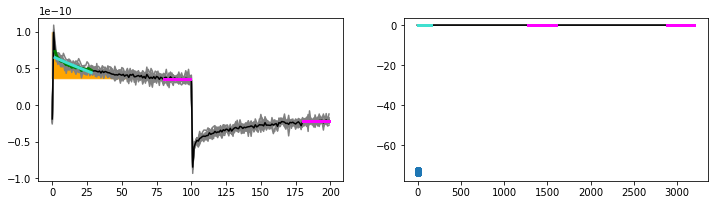

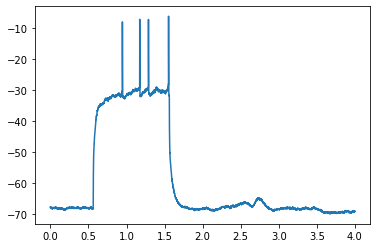

 48%|████▊     | 124/256 [06:34<05:12,  2.37s/it]

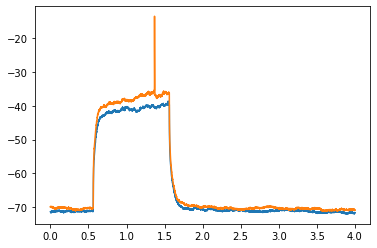

 49%|████▉     | 126/256 [06:36<03:30,  1.62s/it]

error on:  my_ephys_data/2022_08_16/2022x08x16_RNF182_E4KI_F_P255_s003_c006_CA3xNEG_0005.abf


 50%|████▉     | 127/256 [06:38<03:18,  1.54s/it]

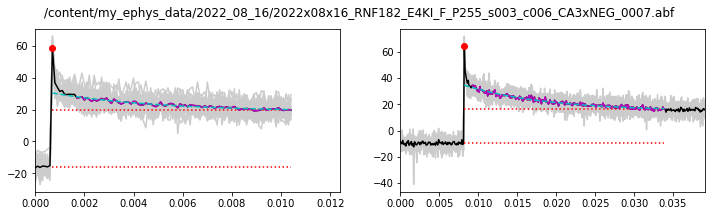

 51%|█████     | 131/256 [06:48<04:01,  1.93s/it]

<Figure size 432x288 with 0 Axes>

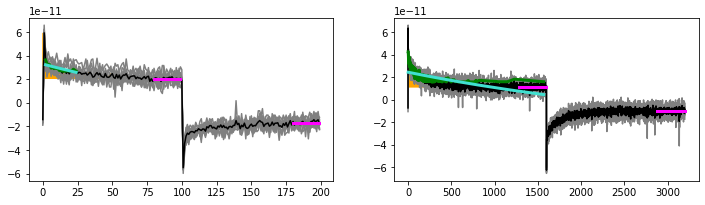

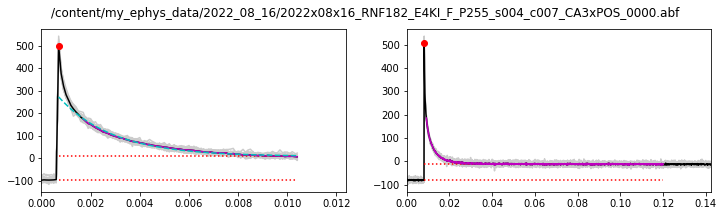

 52%|█████▏    | 133/256 [06:55<04:40,  2.28s/it]

error on:  my_ephys_data/2022_08_16/2022x08x16_RNF182_E4KI_F_P255_s004_c007_CA3xPOS_0001.abf


 52%|█████▏    | 134/256 [06:57<04:38,  2.28s/it]

error on:  my_ephys_data/2022_08_16/2022x08x16_RNF182_E4KI_F_P255_s004_c007_CA3xPOS_0002.abf


<Figure size 432x288 with 0 Axes>

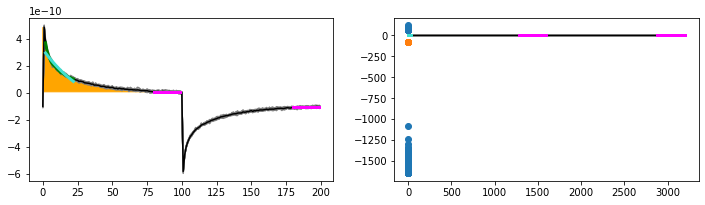

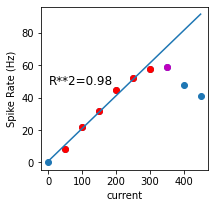

 53%|█████▎    | 135/256 [07:00<05:01,  2.49s/it]

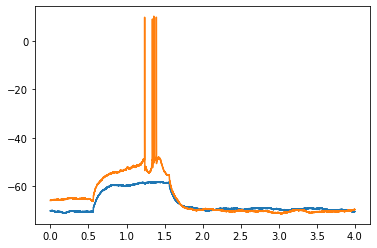

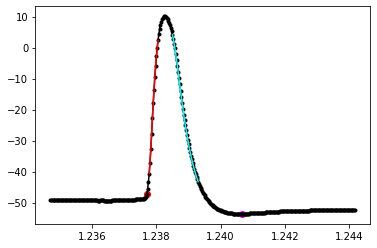

 53%|█████▎    | 136/256 [07:04<06:01,  3.01s/it]

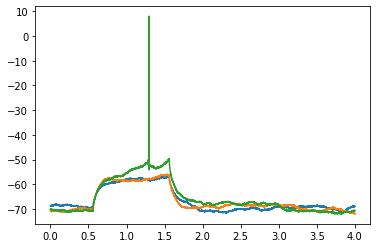

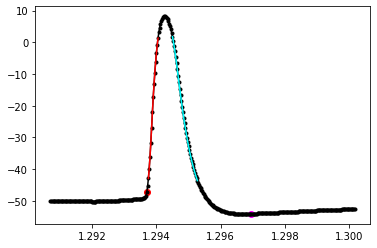

 54%|█████▎    | 137/256 [07:09<06:51,  3.46s/it]

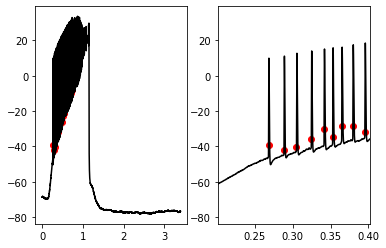

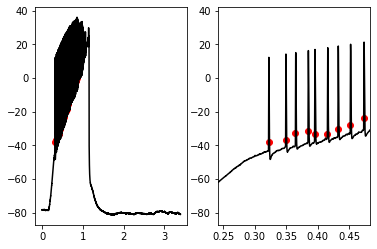

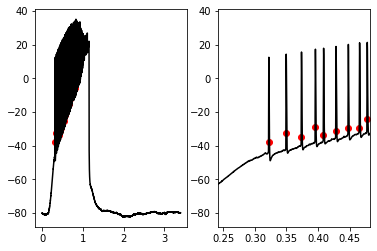

 55%|█████▌    | 141/256 [07:18<04:24,  2.30s/it]

error on:  my_ephys_data/2022_08_16/2022x08x16_RNF182_E4KI_F_P255_s004_c008_CA3xPOS_0000.abf


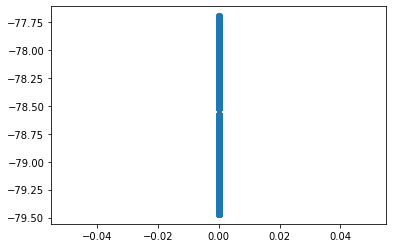

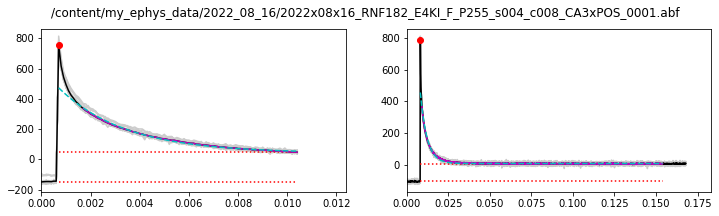

 55%|█████▌    | 142/256 [07:24<06:19,  3.33s/it]

<Figure size 432x288 with 0 Axes>

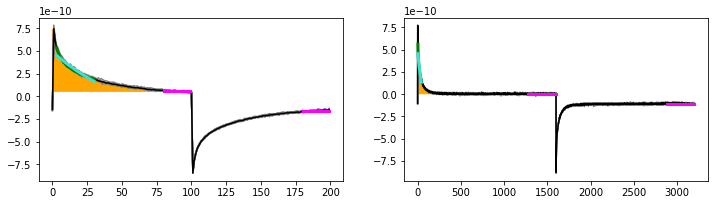

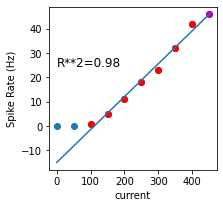

 56%|█████▌    | 143/256 [07:27<06:01,  3.20s/it]

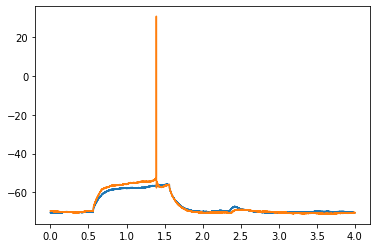

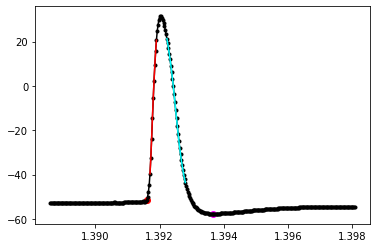

 56%|█████▋    | 144/256 [07:31<06:34,  3.52s/it]

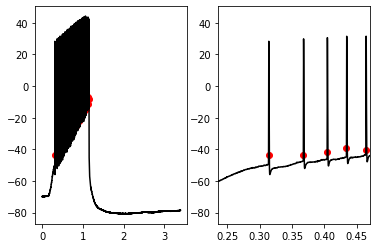

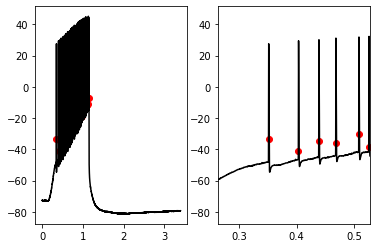

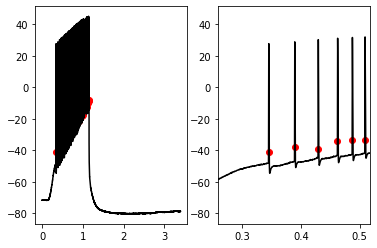

 57%|█████▋    | 147/256 [07:39<04:47,  2.64s/it]

<Figure size 432x288 with 0 Axes>

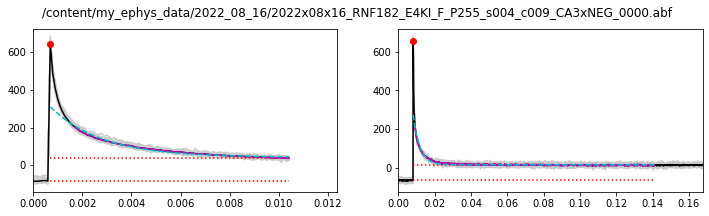

 59%|█████▊    | 150/256 [07:47<04:32,  2.57s/it]

error on:  my_ephys_data/2022_08_16/2022x08x16_RNF182_E4KI_F_P255_s004_c009_CA3xNEG_0001.abf


<Figure size 432x288 with 0 Axes>

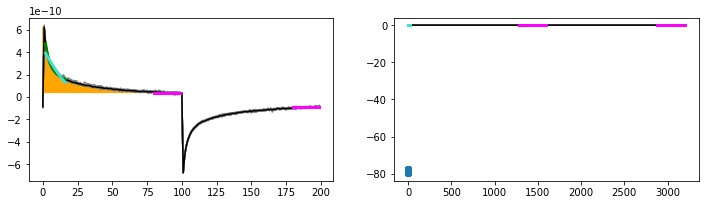

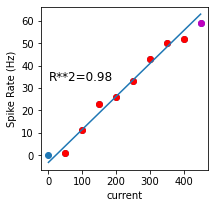

 59%|█████▉    | 151/256 [07:50<04:43,  2.70s/it]

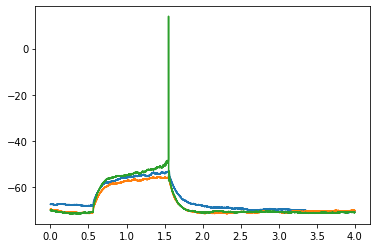

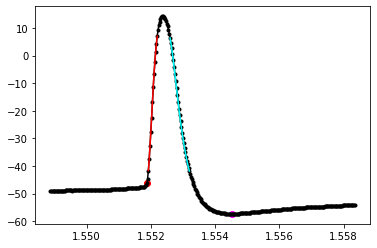

 59%|█████▉    | 152/256 [07:54<05:33,  3.20s/it]

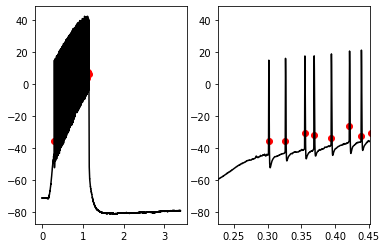

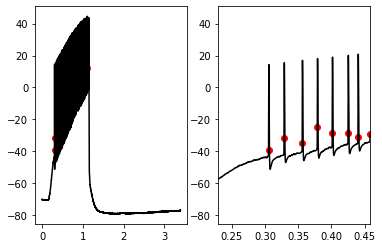

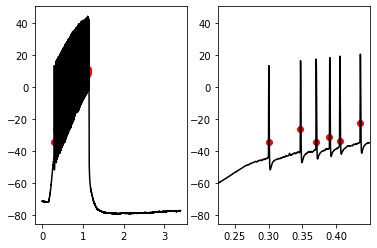

 61%|██████    | 156/256 [08:02<03:17,  1.98s/it]

<Figure size 432x288 with 0 Axes>

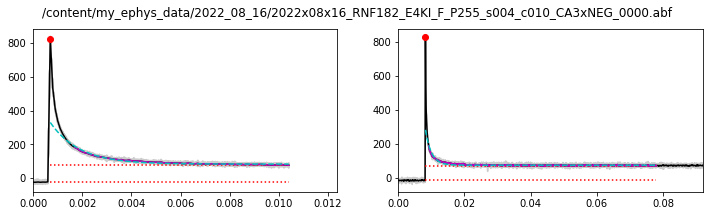

 62%|██████▏   | 158/256 [08:10<04:20,  2.66s/it]

error on:  my_ephys_data/2022_08_16/2022x08x16_RNF182_E4KI_F_P255_s004_c010_CA3xNEG_0001.abf


<Figure size 432x288 with 0 Axes>

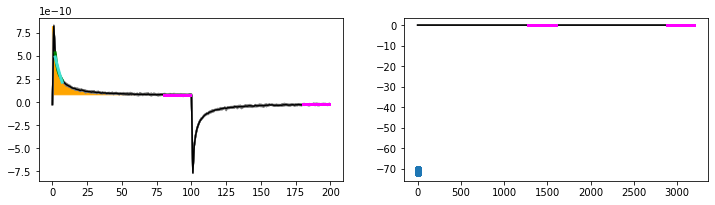

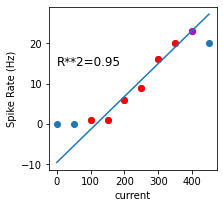

 62%|██████▎   | 160/256 [08:13<03:30,  2.19s/it]

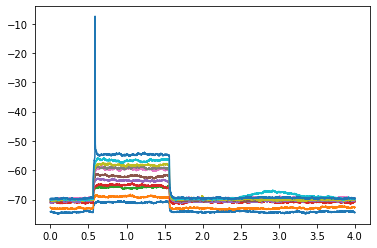

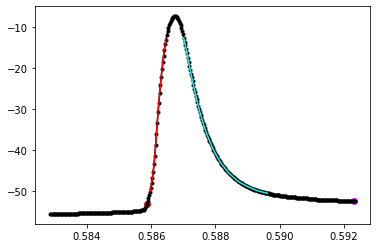

 63%|██████▎   | 161/256 [08:20<05:30,  3.48s/it]

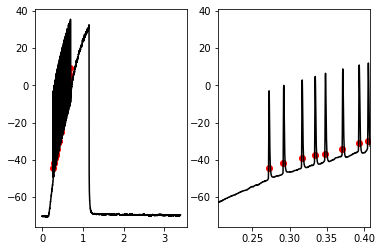

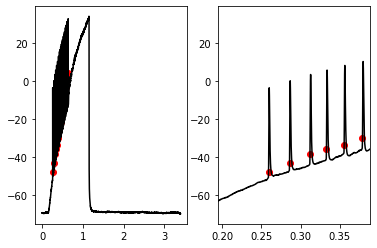

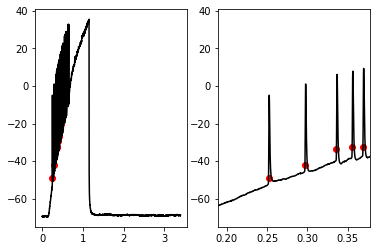

 64%|██████▍   | 165/256 [08:30<03:44,  2.47s/it]

error on:  my_ephys_data/2022_08_16/2022x08x16_RNF182_E4KI_F_P255_s004_c011_CA3xNEG_0000.abf


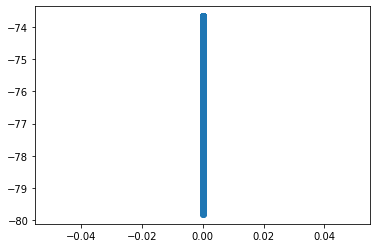

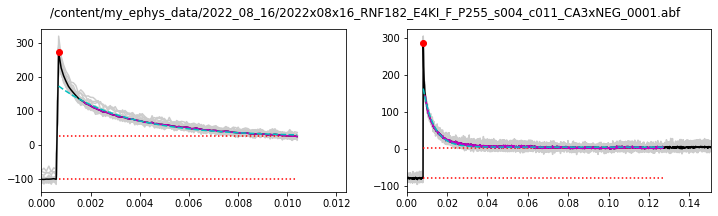

 65%|██████▍   | 166/256 [08:36<05:05,  3.40s/it]

<Figure size 432x288 with 0 Axes>

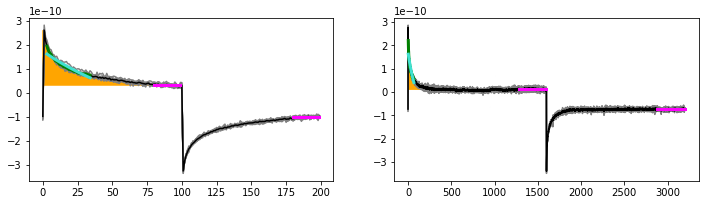

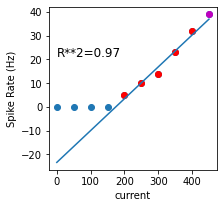

 65%|██████▌   | 167/256 [08:39<04:49,  3.25s/it]

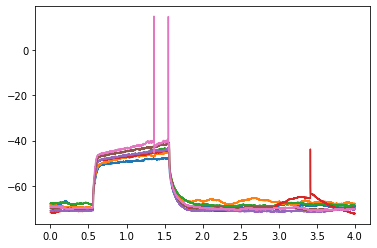

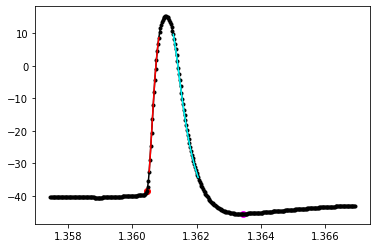

 66%|██████▌   | 168/256 [08:44<05:48,  3.96s/it]

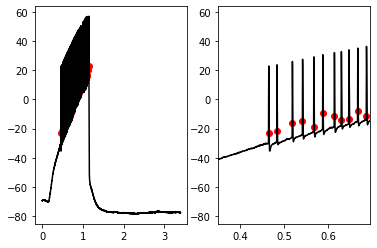

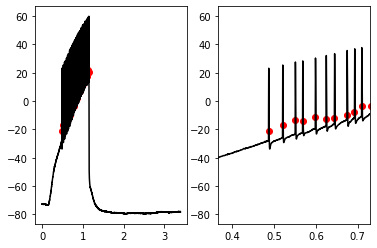

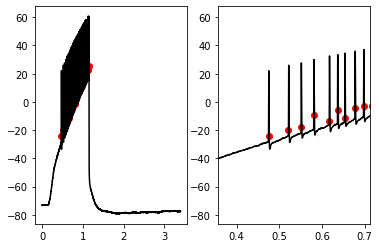

 67%|██████▋   | 172/256 [08:56<04:21,  3.11s/it]

error on:  my_ephys_data/2022_08_17/2022x08x17_RNF182_E4KI_F_P256_s001_c001_CA3xPOS_0000.abf


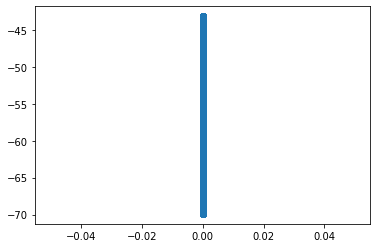

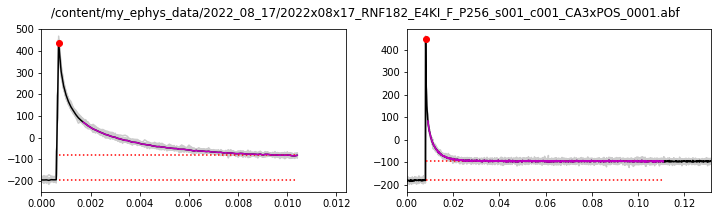

 68%|██████▊   | 173/256 [09:02<05:25,  3.92s/it]

<Figure size 432x288 with 0 Axes>

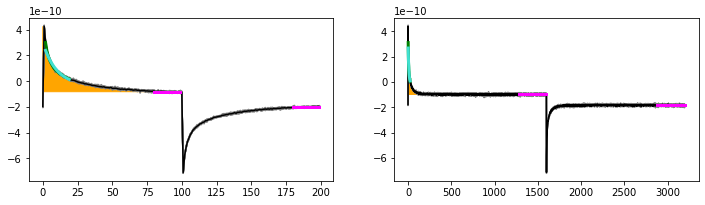

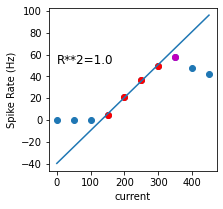

 68%|██████▊   | 174/256 [09:05<04:56,  3.61s/it]

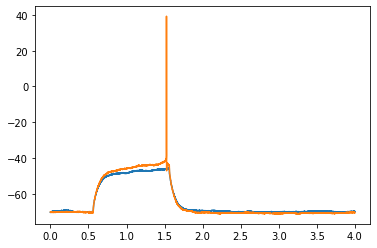

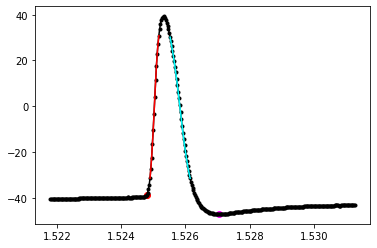

 68%|██████▊   | 175/256 [09:09<05:10,  3.84s/it]

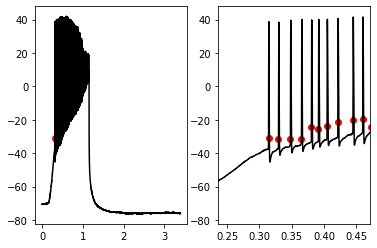

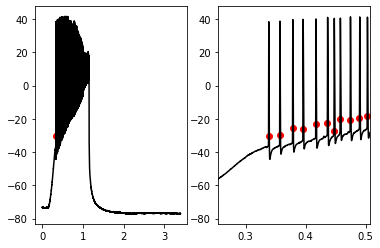

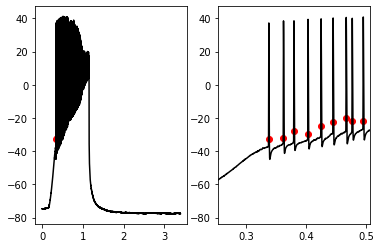

 70%|███████   | 180/256 [09:19<02:20,  1.85s/it]

error on:  my_ephys_data/2022_08_17/2022x08x17_RNF182_E4KI_F_P256_s001_c002_CA3xPOS_0000.abf


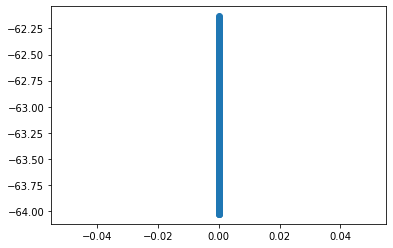

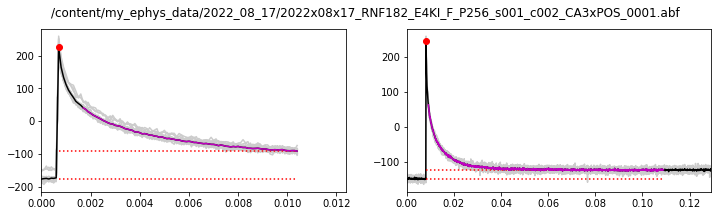

 71%|███████   | 181/256 [09:24<03:30,  2.80s/it]

<Figure size 432x288 with 0 Axes>

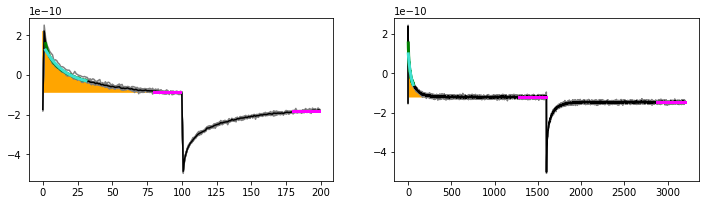

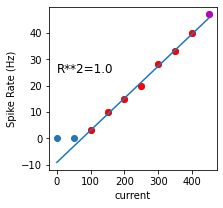

 71%|███████   | 182/256 [09:27<03:29,  2.83s/it]

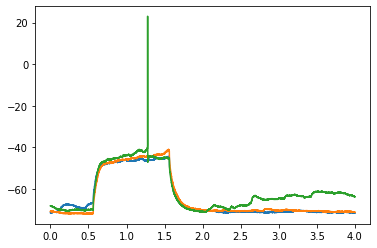

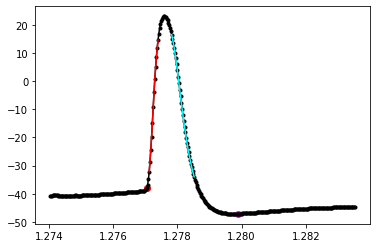

 71%|███████▏  | 183/256 [09:32<04:00,  3.30s/it]

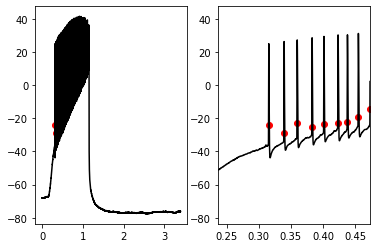

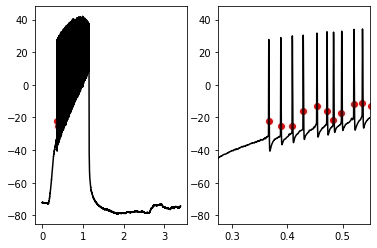

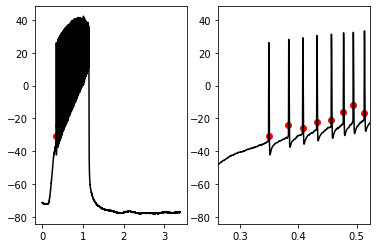

 73%|███████▎  | 186/256 [09:40<03:02,  2.60s/it]

<Figure size 432x288 with 0 Axes>

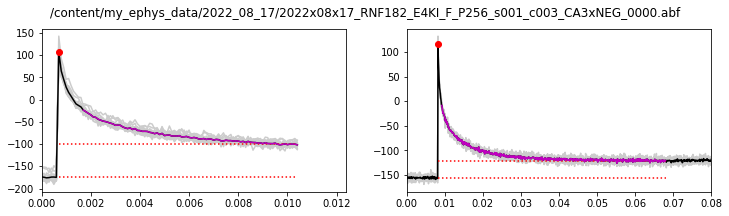

 74%|███████▍  | 189/256 [09:47<02:42,  2.43s/it]

error on:  my_ephys_data/2022_08_17/2022x08x17_RNF182_E4KI_F_P256_s001_c003_CA3xNEG_0001.abf


<Figure size 432x288 with 0 Axes>

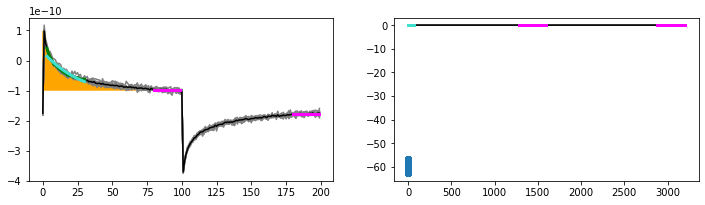

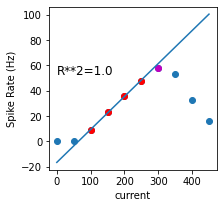

 74%|███████▍  | 190/256 [09:50<02:53,  2.63s/it]

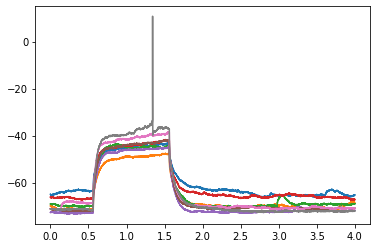

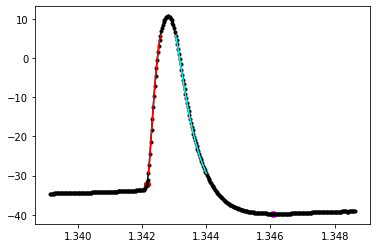

 75%|███████▍  | 191/256 [09:57<03:57,  3.65s/it]

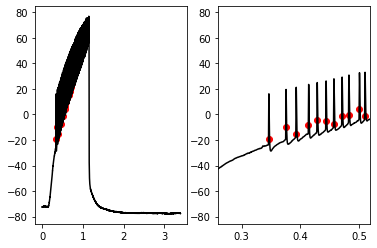

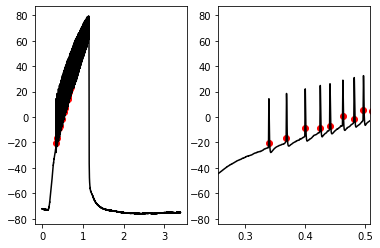

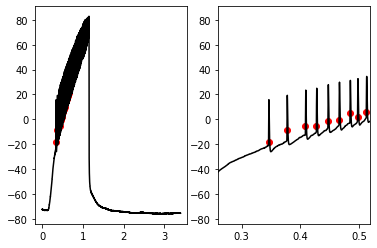

 77%|███████▋  | 196/256 [10:06<01:48,  1.80s/it]

<Figure size 432x288 with 0 Axes>

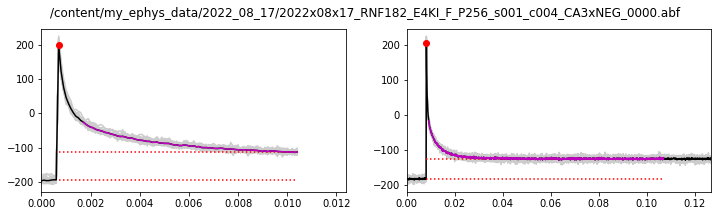

 77%|███████▋  | 198/256 [10:13<02:19,  2.40s/it]

error on:  my_ephys_data/2022_08_17/2022x08x17_RNF182_E4KI_F_P256_s001_c004_CA3xNEG_0001.abf


<Figure size 432x288 with 0 Axes>

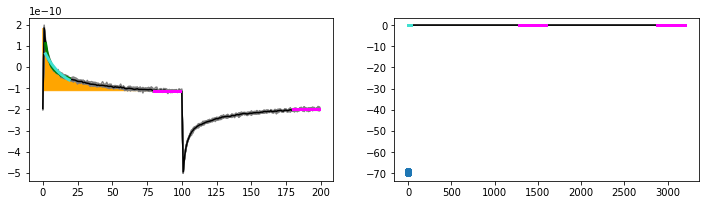

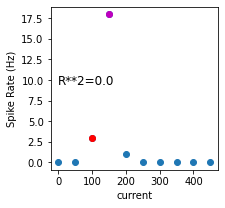

 78%|███████▊  | 199/256 [10:16<02:27,  2.58s/it]

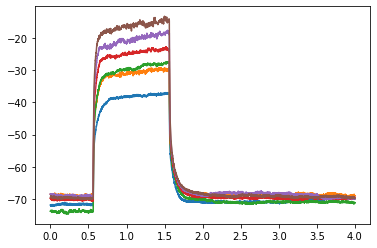

 79%|███████▊  | 201/256 [10:20<02:05,  2.28s/it]

error on:  my_ephys_data/2022_08_17/2022x08x17_RNF182_E4KI_F_P256_s001_c005_CA3xNEG_0000.abf


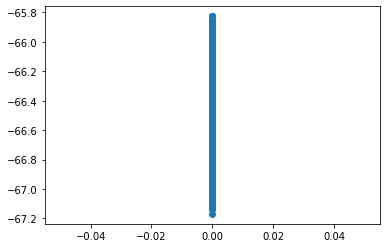

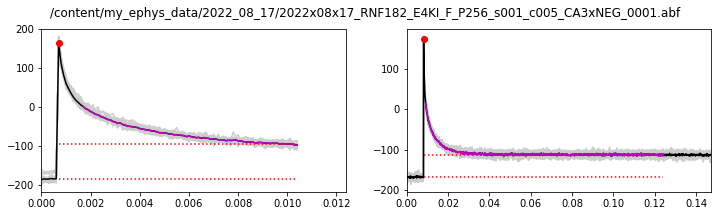

 79%|███████▉  | 202/256 [10:26<02:58,  3.30s/it]

<Figure size 432x288 with 0 Axes>

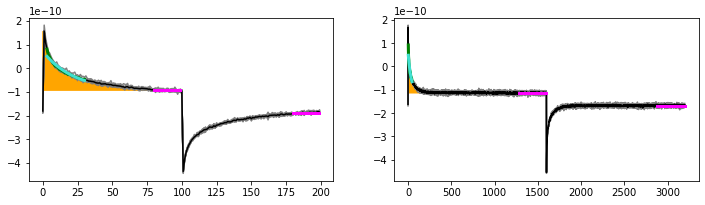

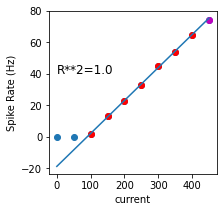

 79%|███████▉  | 203/256 [10:29<02:48,  3.19s/it]

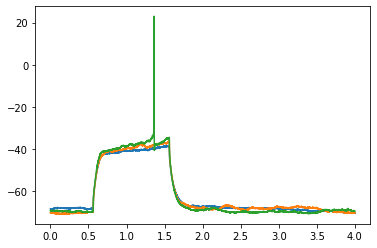

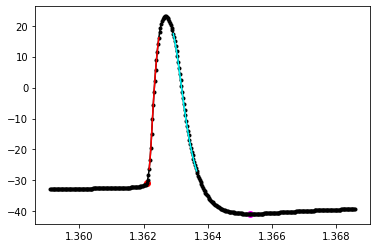

 80%|███████▉  | 204/256 [10:33<03:06,  3.59s/it]

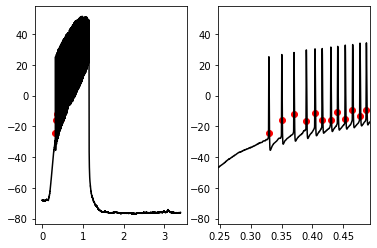

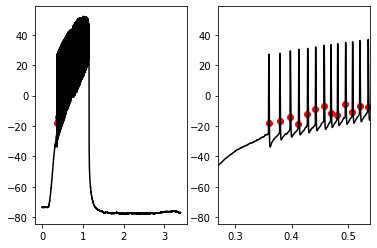

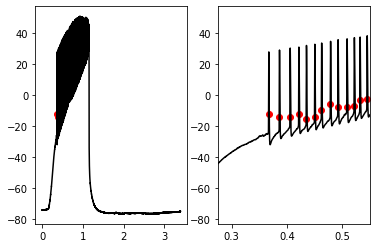

 80%|████████  | 205/256 [10:39<03:27,  4.07s/it]

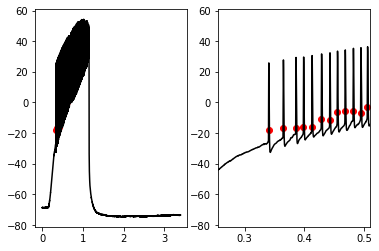

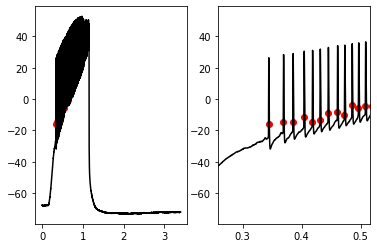

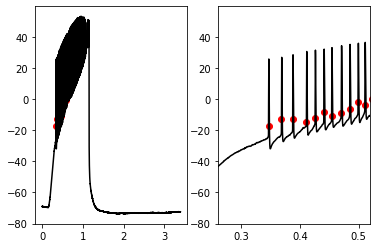

 81%|████████▏ | 208/256 [10:47<02:17,  2.87s/it]

<Figure size 432x288 with 0 Axes>

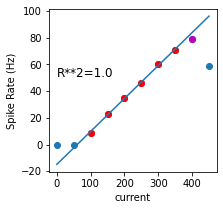

 82%|████████▏ | 209/256 [10:49<02:11,  2.80s/it]

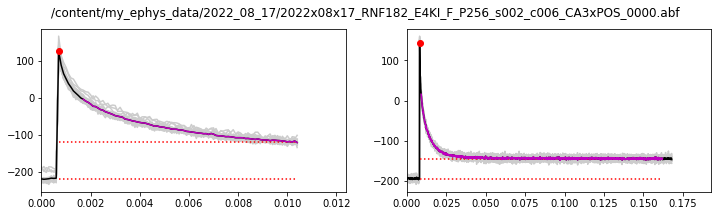

 82%|████████▏ | 211/256 [10:57<02:22,  3.16s/it]

error on:  my_ephys_data/2022_08_17/2022x08x17_RNF182_E4KI_F_P256_s002_c006_CA3xPOS_0001.abf


<Figure size 432x288 with 0 Axes>

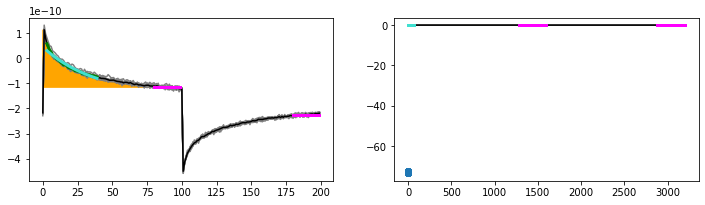

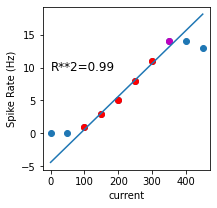

 83%|████████▎ | 212/256 [11:00<02:18,  3.14s/it]

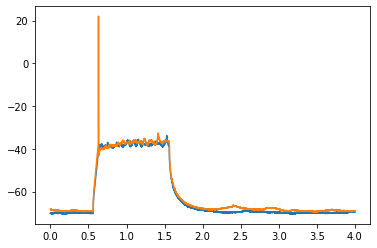

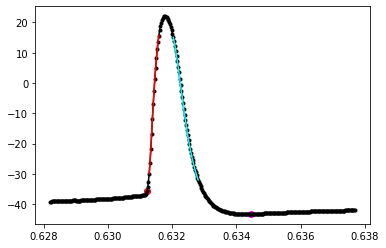

 83%|████████▎ | 213/256 [11:04<02:30,  3.50s/it]

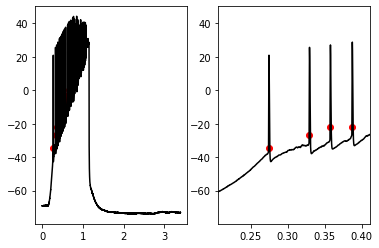

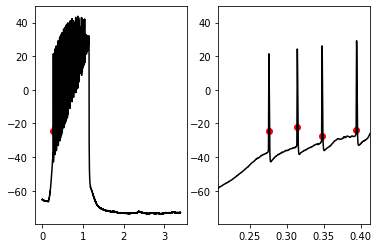

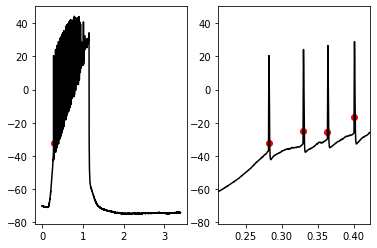

 84%|████████▍ | 216/256 [11:12<01:45,  2.65s/it]

<Figure size 432x288 with 0 Axes>

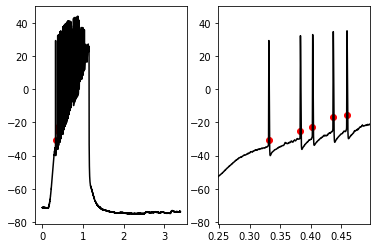

 85%|████████▍ | 217/256 [11:14<01:32,  2.38s/it]

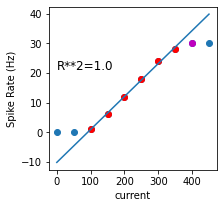

 86%|████████▌ | 220/256 [11:19<01:16,  2.11s/it]

error on:  my_ephys_data/2022_08_17/2022x08x17_RNF182_E4KI_F_P256_s002_c007_CA3xPOS_0000.abf


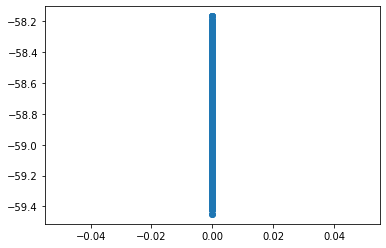

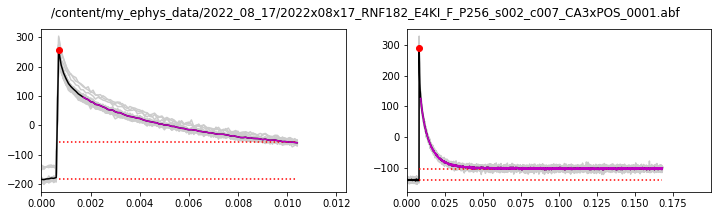

 86%|████████▋ | 221/256 [11:26<01:51,  3.19s/it]

<Figure size 432x288 with 0 Axes>

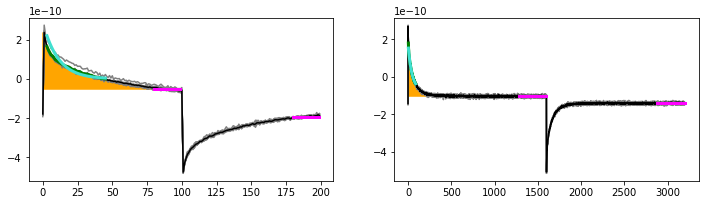

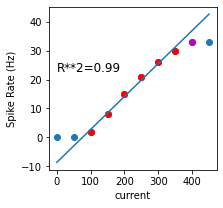

 87%|████████▋ | 222/256 [11:29<01:50,  3.25s/it]

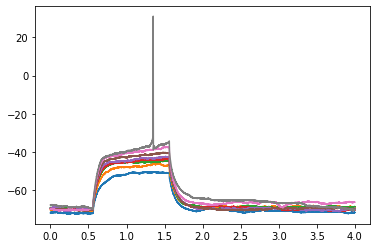

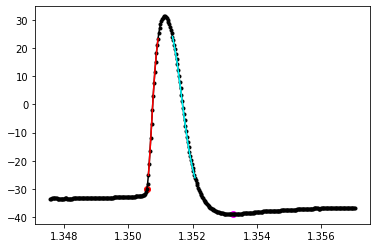

 87%|████████▋ | 223/256 [11:35<02:11,  3.97s/it]

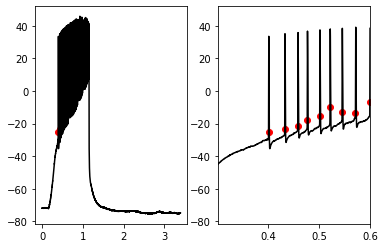

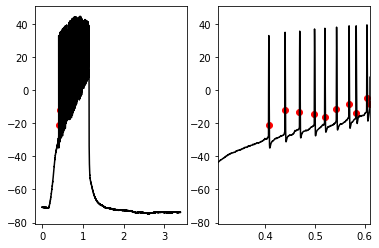

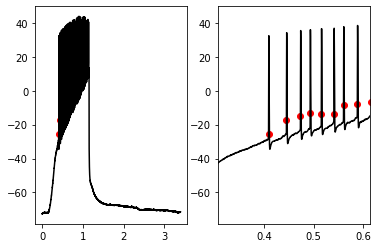

 89%|████████▊ | 227/256 [11:44<01:09,  2.41s/it]

<Figure size 432x288 with 0 Axes>

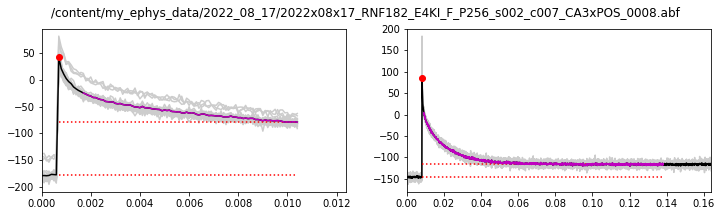

 89%|████████▉ | 229/256 [11:54<01:31,  3.38s/it]

error on:  my_ephys_data/2022_08_17/2022x08x17_RNF182_E4KI_F_P256_s002_c008_CA3xNEG_0000.abf


<Figure size 432x288 with 0 Axes>

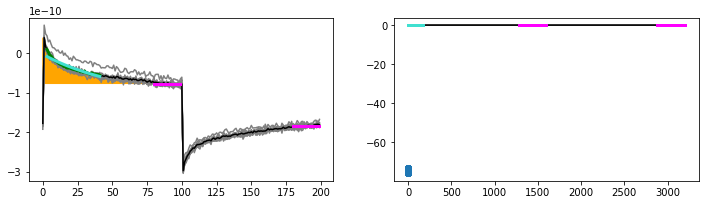

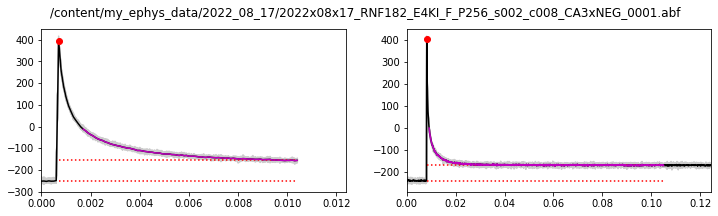

 90%|████████▉ | 230/256 [12:01<01:54,  4.42s/it]

<Figure size 432x288 with 0 Axes>

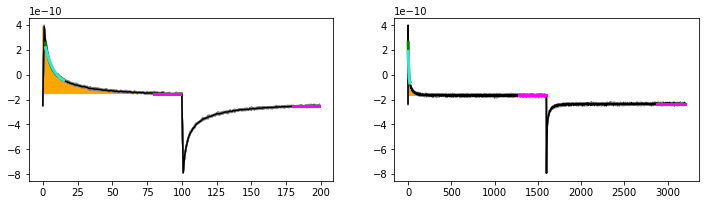

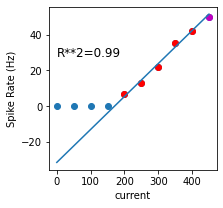

 90%|█████████ | 231/256 [12:04<01:39,  3.97s/it]

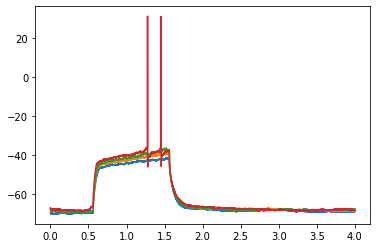

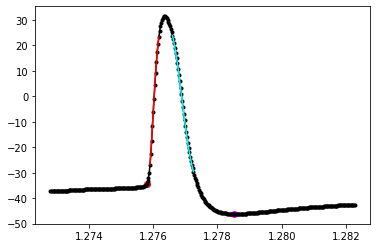

 91%|█████████ | 232/256 [12:09<01:42,  4.26s/it]

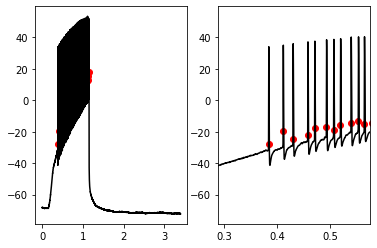

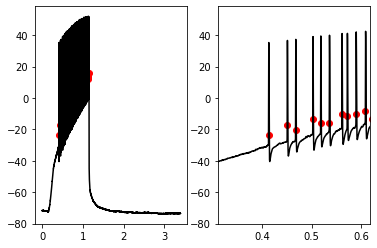

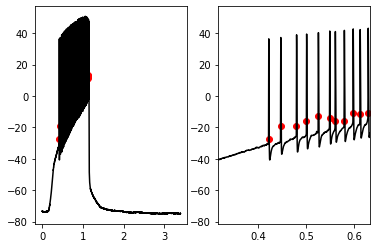

 93%|█████████▎| 237/256 [12:17<00:31,  1.67s/it]

error on:  my_ephys_data/2022_08_17/2022x08x17_RNF182_E4KI_F_P256_s002_c009_CA3xPOS_0000.abf


 93%|█████████▎| 238/256 [12:19<00:31,  1.77s/it]

error on:  my_ephys_data/2022_08_17/2022x08x17_RNF182_E4KI_F_P256_s002_c009_CA3xPOS_0001.abf


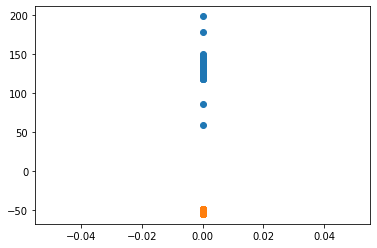

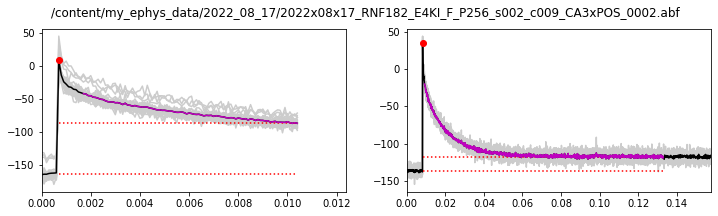

 93%|█████████▎| 239/256 [12:25<00:48,  2.85s/it]

<Figure size 432x288 with 0 Axes>

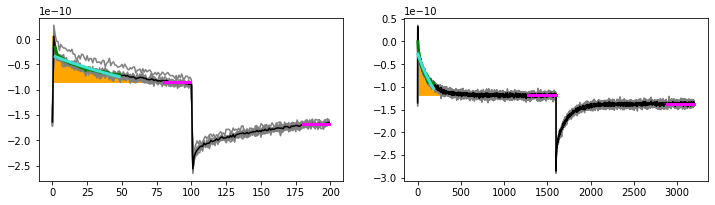

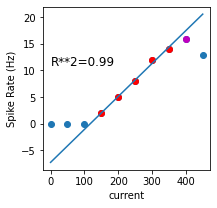

 94%|█████████▍| 240/256 [12:28<00:46,  2.88s/it]

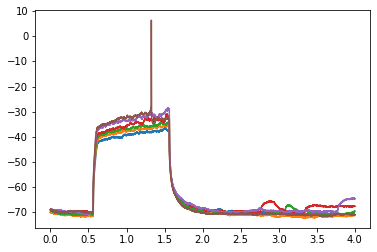

 95%|█████████▍| 242/256 [12:31<00:29,  2.13s/it]

error on:  my_ephys_data/2022_08_17/2022x08x17_RNF182_E4KI_F_P256_s002_c009_CA3xPOS_0005.abf


 95%|█████████▌| 244/256 [12:34<00:21,  1.75s/it]

<Figure size 432x288 with 0 Axes>

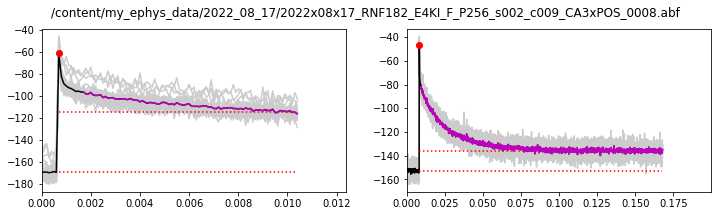

 96%|█████████▌| 246/256 [12:41<00:25,  2.55s/it]

error on:  my_ephys_data/2022_08_17/2022x08x17_RNF182_E4KI_F_P256_s002_c010_CA3xNEG_0000.abf


<Figure size 432x288 with 0 Axes>

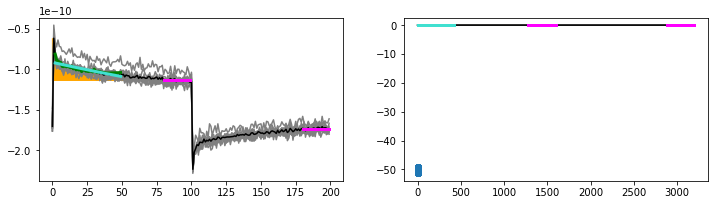

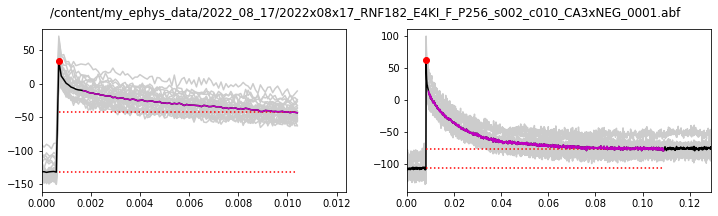

 96%|█████████▋| 247/256 [12:47<00:32,  3.61s/it]

<Figure size 432x288 with 0 Axes>

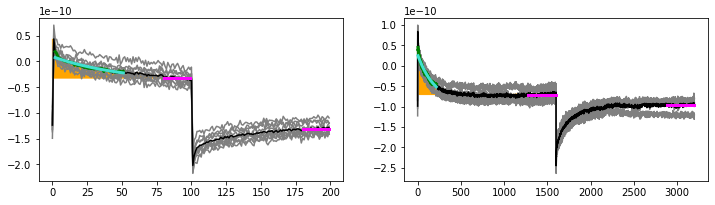

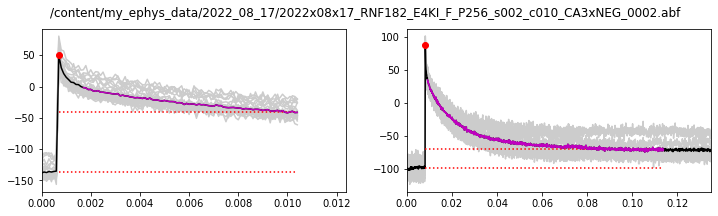

 97%|█████████▋| 248/256 [12:53<00:34,  4.31s/it]

<Figure size 432x288 with 0 Axes>

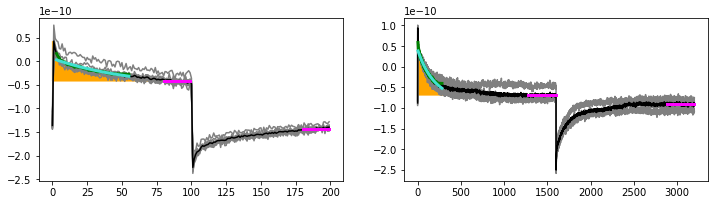

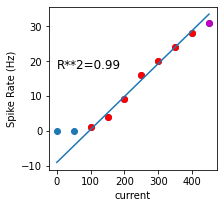

 97%|█████████▋| 249/256 [12:57<00:27,  3.98s/it]

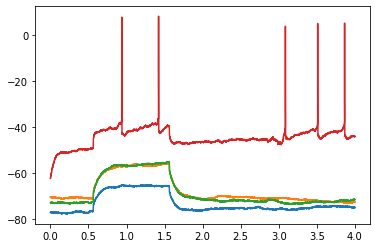

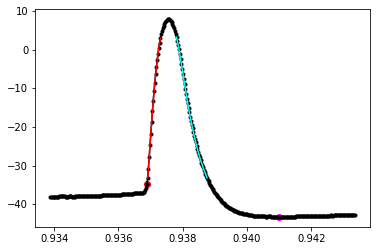

 98%|█████████▊| 250/256 [13:03<00:28,  4.75s/it]

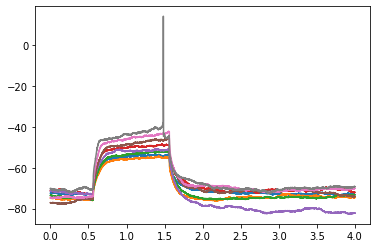

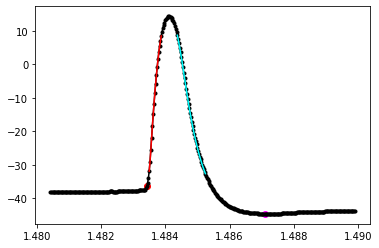

 98%|█████████▊| 251/256 [13:09<00:25,  5.11s/it]

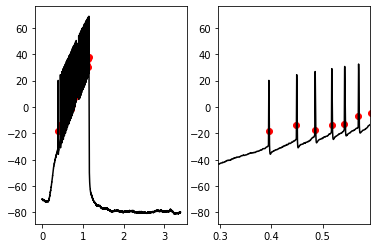

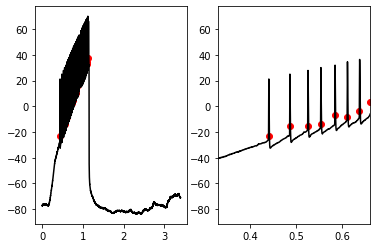

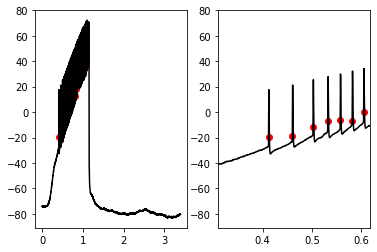

 99%|█████████▉| 254/256 [13:17<00:06,  3.22s/it]

<Figure size 432x288 with 0 Axes>

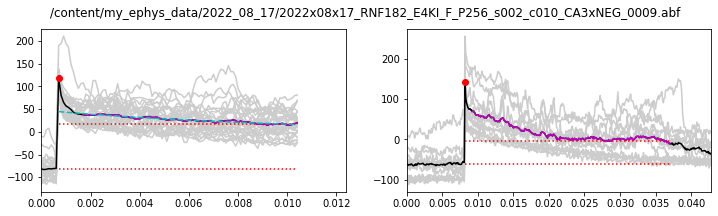

100%|█████████▉| 255/256 [13:23<00:04,  4.01s/it]

<Figure size 432x288 with 0 Axes>

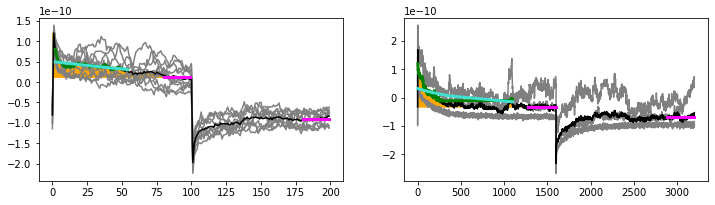

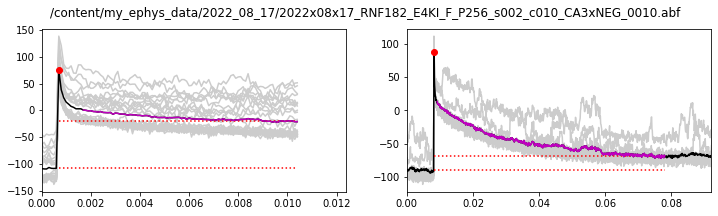

100%|██████████| 256/256 [13:29<00:00,  3.16s/it]

['my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s001_c001_CA3xPOS_0000.abf', 'my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s001_c001_CA3xPOS_0014.abf', 'my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s001_c002_CA3xPOS_0000.abf', 'my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s001_c003_CA3xNEG_0007.abf', 'my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s001_c004_CA3xNEG_0000.abf', 'my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s001_c005_CA3xNEG_0000.abf', 'my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s002_c006_CA3xPOS_0000.abf', 'my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s002_c006_CA3xPOS_0006.abf', 'my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s002_c007_CA3xPOS_0001.abf', 'my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s002_c008_CA3xPOS_0000.abf', 'my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s002_c008_CA3xPO

In [5]:


'''Set Internal Analysis Params'''
spike_args =  {'spike_thresh':20, 'high_dv_thresh': 50,'low_dv_thresh': -30,'window_ms': 2}

func_dict = {}
arg_dict = {}

func_dict['VC - 3min GapFree']= rmp_analyzer
arg_dict['VC - 3min GapFree'] = [True] # [to_plot?]

func_dict['IC - Rheobase']= rheobase_analyzer
arg_dict['IC - Rheobase'] = [spike_args, True, False, False]  # [spike_args, to_plot, verbose, force_singlespike]

func_dict['IC - Gain - D20pA']= gain_analyzer
arg_dict['IC - Gain - D20pA']= [spike_args, 1]  # [spike_args, to_plot [0:2],]
func_dict['IC - Gain - D50pA']= func_dict['IC - Gain - D20pA'] 
arg_dict['IC - Gain - D50pA']= arg_dict['IC - Gain - D20pA']

func_dict['VC - MemTest-10ms-160ms']= membrane_analyzer
arg_dict['VC - MemTest-10ms-160ms']= [True, False, ['Ra', 'Rm', 'Cm', 'tau',	'Cmq',	'Cmf',	'Cmqf', 'Cm_pc']]  # [to_plot, verbose]

func_dict['IC - Latentcy 800pA-1s']= latencey_analyzer 
arg_dict['IC - Latentcy 800pA-1s']= [spike_args, True]  # [spike_args, to_plot]


func_dict['IC - R input']= input_resistance_analyzer 
arg_dict['IC - R input']= [[-30, 10] ,True]  # [dVm_limits, to_plot]

func_dict['VC - Multi IV - 150ms'] = IV_analyzer
arg_dict['VC - Multi IV - 150ms']= [{'IV_Early':(16.5, 30),'IV_Steady_State':(100,120)} ,False]  # [measure_windows, to_plot]


'''Analyze Dataset'''
abf_recordings_df, problem_recs = analysis_iterator(abf_recordings_df,func_dict,arg_dict)
print(problem_recs) 



In [11]:

!zip -r /content/Saved_Figs.zip /content/Saved_Figs
files.download('Saved_Figs.zip')

  adding: content/Saved_Figs/ (stored 0%)
  adding: content/Saved_Figs/AP_Params/ (stored 0%)
  adding: content/Saved_Figs/AP_Params/AP_Params_2022x08x16_RNF182_E4KI_F_P255_s004_c011_CA3xNEG_0003.png (deflated 26%)
  adding: content/Saved_Figs/AP_Params/AP_Params_2022x08x17_RNF182_E4KI_F_P256_s001_c001_CA3xPOS_0003.png (deflated 27%)
  adding: content/Saved_Figs/AP_Params/AP_Params_2022x08x17_RNF182_E4KI_F_P256_s002_c006_CA3xPOS_0003.png (deflated 25%)
  adding: content/Saved_Figs/AP_Params/AP_Params_2022x08x15_RNF182_E4KI_F_P251_s001_c001_CA3xPOS_0004.png (deflated 26%)
  adding: content/Saved_Figs/AP_Params/AP_Params_2022x08x16_RNF182_E4KI_F_P255_s004_c007_CA3xPOS_0004.png (deflated 26%)
  adding: content/Saved_Figs/AP_Params/AP_Params_2022x08x12_RNF182_E4KI_F_P251_s001_c003_CA3xNEG_0011.png (deflated 25%)
  adding: content/Saved_Figs/AP_Params/AP_Params_2022x08x12_RNF182_E4KI_F_P251_s001_c002_CA3xPOS_0008.png (deflated 25%)
  adding: content/Saved_Figs/AP_Params/AP_Params_2022x08x17

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
cell_df = cell_sorting(abf_recordings_df)

'''Consolidate to Cells'''
list_types = ['Recording_name','protocol','abf_timestamp', 'channelList']
any_types = ['Rec_date',	'Virus',	'GenoType',	'Sex',	'Age',	'Slice_Num',  'Cell_num', 'Cell_Type']
cell_df_con = cell_consolidation(cell_df,list_types,any_types)
cols_to_simplify = ['IV_Early', 'IV_Steady_State']
cell_df_nd = simplify_dicts(cell_df_con,cols_to_simplify)     

'''Make Excell Friendly'''
keys_and_data_cols={'Stim_Levels_(pA)': ['Stim_Levels_(pA)', 'Spike_Counts' ],
                'IV_Early_(V_stim)': ['IV_Early_(V_stim)', 'IV_Early_(I_peak)', 'IV_Steady_State_(I_mean)']}
cell_df_csv = csv_frinedly(cell_df_nd,keys_and_data_cols)

''' Convert to Current Density'''
size_col = 'Cmq_160.0'
current_col_list = ['IV_Early_(I_peak)_', 'IV_Steady_State_(I_mean)_']
cell_df_csv = current_density_correction(cell_df_csv, size_col, current_col_list)


'''Abridge DataFrame'''
abrg_exclusions = ['Recording_name', 
                'protocol', 'abf_timestamp', 'channelList',  'Ra_10.0', 'Rm_10.0', 'tau_10.0', 'Cmq_10.0', 'Cmf_10.0',
                'Cmqf_10.0',  'Cmf_160.0', 'Cmqf_160.0', 'Cm_pc_160.0',
                'Gain_R2', 'Stim_Levels_(pA)', 'Spike_Counts', 'Firing_Duration_%', 'Gain_Vh',  'Vhold_spike',
                    'Rin_Rsqr',  'Ramp_AP_thresh', 'Ramp_Vh', 'Ramp_Rheobase', 
                'ap_thresh_us', 'v_half',
                'IV_Early_(range)', 'IV_Early_(I_peak)', 'IV_Early_(I_mean)', 'IV_Early_(V_stim)', 'IV_Steady_State_(range)',
                'IV_Steady_State_(I_peak)', 'IV_Steady_State_(I_mean)', 'IV_Steady_State_(V_stim)', ]

abrg_keep = [c for c in cell_df_csv.columns if c not in abrg_exclusions]
cell_df_csv_abrg = cell_df_csv[abrg_keep]

'''Stratify Cells By Type'''
strat_col = 'Cell_Type'
xl_file_name= data_name+'.xlsx'
new_dfs = stratify_cells(cell_df_csv_abrg,strat_col,xl_file_name)

In [8]:
def write_strat_dfs(strat_dfs, xl_file_name='stratified_data.xlsx'):
    if '.xlsx' not in xl_file_name: xl_file_name = xl_file_name+'.xlsx'
    options = {}
    options['strings_to_formulas'] = False
    options['strings_to_urls'] = False
    writer = pd.ExcelWriter(xl_file_name, options=options)
    for k in strat_dfs.keys():
        cur_df = strat_dfs[k]
        strat_dfs[k].to_excel(writer, sheet_name=str(k))
    writer.save()
    writer.close()
    files.download(xl_file_name)
    return None

def flatten_dict(my_dict,flat_dict = {} ):
    for k in my_dict.keys():
        if isinstance(my_dict[k], dict):
            sub_dict, sub_keys = flatten_dict(my_dict[k],flat_dict)
            for sk in sub_keys:
                flat_dict[k+'_'+sk] = sub_dict[sk]
        else:
            flat_dict = my_dict
    return flat_dict, list(flat_dict.keys()) 

In [9]:
strat_col = ['Rec_date','Cell_Type']

strat_df_dict = stratify_rec(cell_df_csv_abrg,strat_col)
strat_df_dict,_ = flatten_dict(strat_df_dict,{})
write_strat_dfs(strat_df_dict, dataset['data_name'])


NameError: ignored